In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly import tools
from plotly.subplots import make_subplots
import plotly.offline as py
import seaborn as sns
from ast import literal_eval
from collections import Counter
from sklearn.preprocessing import MinMaxScaler

In [2]:
plt.style.use('ggplot')

In [3]:
plt.style.use('seaborn-bright')

In [4]:
user_profile = pd.read_csv("data/user_profile/prepared/User_Profile_Reduced_with_clusters.csv")

In [5]:
user_profile.drop(["Unnamed: 0","Subscription"],axis=1,inplace=True)

In [6]:
user_profile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 76 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   event_source.hash                    3000 non-null   object 
 1   ACCOUNT_NUM.hash                     3000 non-null   object 
 2   CUSTOMER_REF.hash                    3000 non-null   object 
 3   ONNET_OUTGOING_Categorical           3000 non-null   object 
 4   ONNET_OUTGOING_Scaled                3000 non-null   float64
 5   ONNET_OUTGOING_Outlier               3000 non-null   object 
 6   ONNET_INCOMING_Categorical           2890 non-null   object 
 7   ONNET_INCOMING_Scaled                2890 non-null   float64
 8   ONNET_INCOMING_Outlier               2890 non-null   object 
 9   OFFNET_OUTGOING_Categorical          2886 non-null   object 
 10  OFFNET_OUTGOING_Scaled               2886 non-null   float64
 11  OFFNET_OUTGOING_Outlier       

## Filling null values

In [7]:
cat_cols = ["BB_Categorical","PEO_TV_Categorical","IDD_INCOMING_Categorical","IDD_OUTGOING_Categorical",
            "ONNET_OUTGOING_Categorical","OFFNET_OUTGOING_Categorical","ONNET_INCOMING_Categorical",
            "OFFNET_INCOMING_Categorical","IDD_incoming_country","IDD_outgoing_country","IDD_Overall_Categorical",
            "Location_Identifier","GENDER","Voice_VAS_Month_Subscribed","BB_VAS_Month_Subscribed", "VOICE_Categorical",
            "Peo_VAS_Month_Subscribed","Other_VAS_Month_Subscribed","BB_Extra_GB_Purchase_Categorical",
            "Peo_TV_Package","Voice_VAS_Package","BB_VAS_Package","Other_VAS_Package",
            "Having_Insurance","Having_Senior_Citizen","Having_Kids_at_Home","Having_Teenagers_Students",
            "Having_Working_Professionals","Having_Family_Member_Abroad","Tamil_Customer"]

In [8]:
user_profile[cat_cols]= user_profile[cat_cols].fillna("NO_INFO")

### Cluster Counts

In [9]:
user_profile["Cluster"].value_counts()

1    1476
2     847
0     677
Name: Cluster, dtype: int64

<AxesSubplot:ylabel='Cluster'>

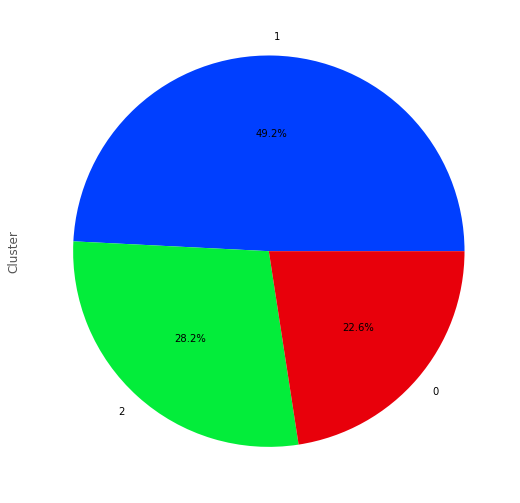

In [10]:
user_profile["Cluster"].value_counts().plot(kind='pie', figsize=(9,9), autopct='%1.1f%%')

# Cluster analysis - Cluster 2

In [11]:
cluster_2 = user_profile[(user_profile["Cluster"]==2)]

In [12]:
cluster_2.describe()

ONNET_OUTGOING_Scaled  ONNET_INCOMING_Scaled  OFFNET_OUTGOING_Scaled  \
count             847.000000             825.000000              826.000000   
mean                0.092145               0.093089                0.100296   
std                 0.086527               0.087240                0.092697   
min                 0.001202               0.001202                0.001202   
25%                 0.022370               0.022665                0.027019   
50%                 0.063751               0.063874                0.076089   
75%                 0.141250               0.141827                0.147407   
max                 0.599588               0.692651                0.643887   

       OFFNET_INCOMING_Scaled  IDD_INCOMING_Scaled  IDD_OUTGOING_Scaled  \
count              838.000000           370.000000           100.000000   
mean                 0.109301             0.069207             0.097949   
std                  0.086555             0.138776             0.168895   
min                  0.001202             0.002500             0.004808   
25%                  0.036205             0.005000             0.014022   
50%                  0.094351             0.014000             0.037660   
75%                  0.160990             0.060000             0.097756   
max                  0.589596             0.838667             0.833333   

       IDD_outgoing_Cumulative_Revenue  PEO_TV_Scaled   BB_Scaled  \
count                     1.000000e+02     840.000000  503.000000   
mean                      6.932948e+05       0.669033    0.381323   
std                       1.705386e+06       0.265875    0.248392   
min                       1.388000e+03       0.000000    0.005208   
25%                       2.380200e+04       0.537500    0.185764   
50%                       1.368080e+05       0.712500    0.338542   
75%                       3.951990e+05       0.893750    0.541667   
max                       1.083867e+07       0.975000    1.000000   

        BIRTH_YEAR         AGE  BB_Extra_GB_Purchased_Times  \
count   734.000000  734.000000                    57.000000   
mean   1965.679837   55.320163                     4.964912   
std      14.570324   14.570324                     8.697218   
min    1900.000000   21.000000                     1.000000   
25%    1956.000000   45.000000                     1.000000   
50%    1966.000000   55.000000                     2.000000   
75%    1976.000000   65.000000                     5.000000   
max    2000.000000  121.000000                    54.000000   

       BB_Extra_GB_Purchased_Scaled  Having_Senior_Citizen_Scaled  \
count                     57.000000                    847.000000   
mean                       0.071518                      0.263164   
std                        0.148554                      0.267531   
min                        0.010000                      0.000000   
25%                        0.010000                      0.000000   
50%                        0.017241                      0.300000   
75%                        0.068966                      0.400000   
max                        0.913793                      1.200000   

       Having_Kids_at_Home_Scaled  Having_Teenagers_Students_Scaled  \
count                  847.000000                        847.000000   
mean                     0.361452                          0.267532   
std                      0.177366                          0.196112   
min                      0.000000                          0.000000   
25%                      0.200000                          0.100000   
50%                      0.450000                          0.200000   
75%                      0.450000                          0.400000   
max                      1.050000                          1.300000   

       Having_Working_Professionals_Scaled  \
count                           847.000000   
mean                              0.298878   
std                          

#### Exceptional (Outlier Usage)

<AxesSubplot:>

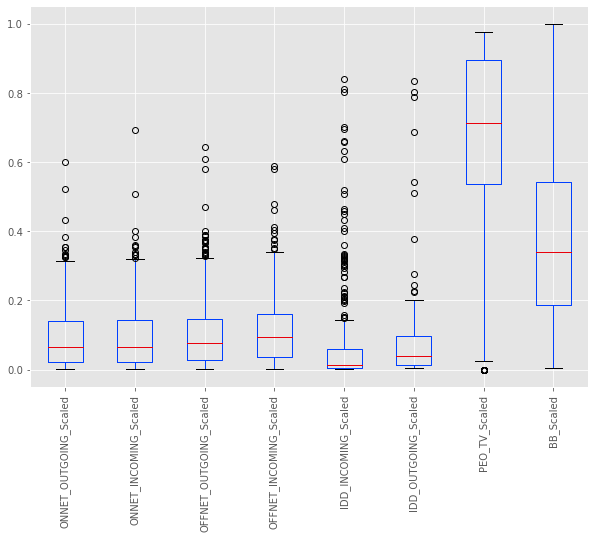

In [13]:
cluster_2.iloc[:,[4,7,10,13,16,20,26,28,62]].boxplot(figsize=(10,7),rot=90)

### Exceptional Users (Outliers) analysis

In [14]:
out_cols = ["ONNET_OUTGOING_Outlier","ONNET_INCOMING_Outlier","OFFNET_OUTGOING_Outlier","OFFNET_INCOMING_Outlier","IDD_INCOMING_Outlier","IDD_OUTGOING_Outlier"]
scaled_cols=["ONNET_OUTGOING_Scaled","ONNET_INCOMING_Scaled","OFFNET_OUTGOING_Scaled","OFFNET_INCOMING_Scaled","IDD_INCOMING_Scaled","IDD_OUTGOING_Scaled"]

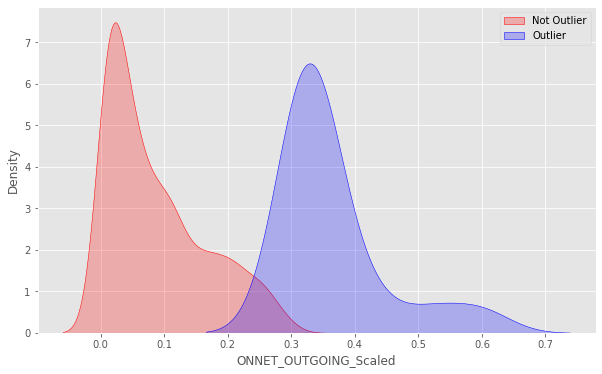

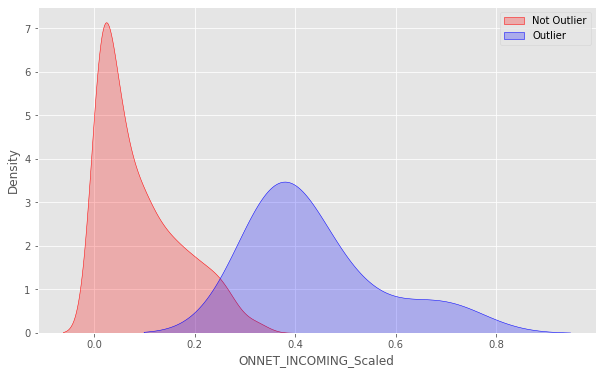

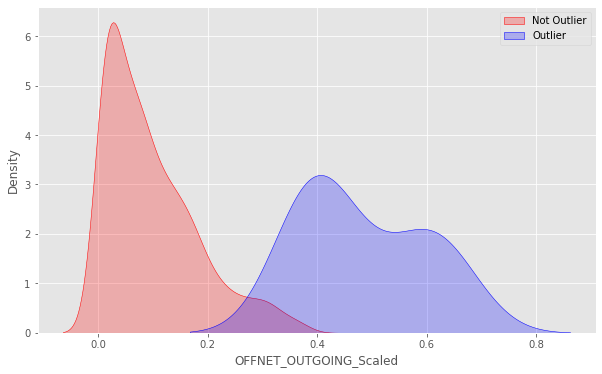

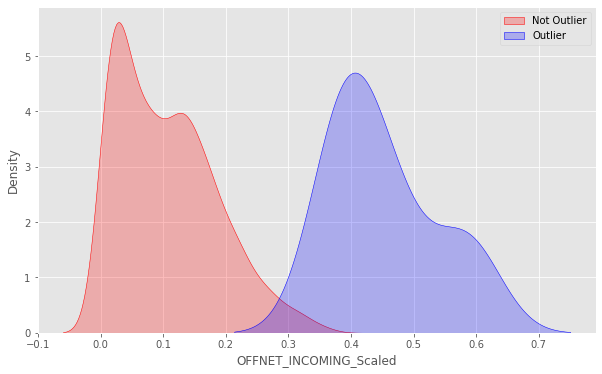

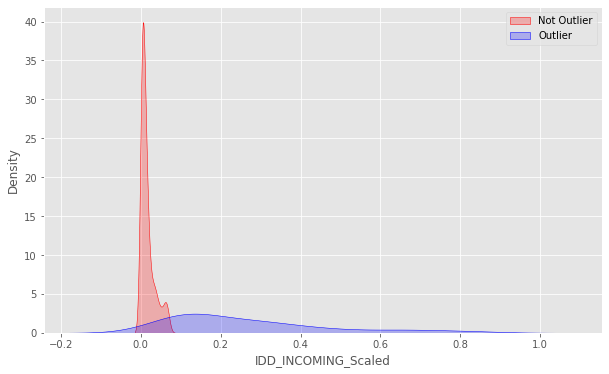

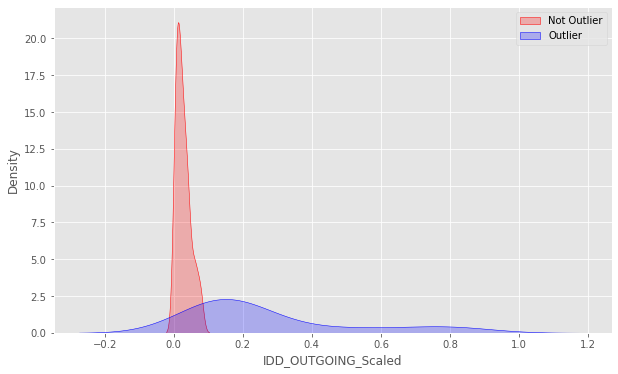

In [15]:
for i in range (0,6):
    plt.figure(figsize=(10,6))
    ax = sns.kdeplot(cluster_2[scaled_cols[i]][(cluster_2[out_cols[i]] == 'NO') ], color="Red", shade = True)
    ax = sns.kdeplot(cluster_2[scaled_cols[i]][(cluster_2[out_cols[i]] == 'YES') ], ax =ax, color="Blue", shade= True)
    ax.legend(["Not Outlier","Outlier"],loc='upper right')
    ax.set_ylabel('Density')

In [16]:
# Voice Outliers
cluster_2_out = cluster_2[(cluster_2["ONNET_OUTGOING_Outlier"]=="YES") | (cluster_2["ONNET_INCOMING_Outlier"]=="YES") | (cluster_2["OFFNET_OUTGOING_Outlier"]=="YES") | (cluster_2["OFFNET_INCOMING_Outlier"]=="YES") | (cluster_2["IDD_OUTGOING_Outlier"]=="YES") | (cluster_2["IDD_INCOMING_Outlier"]=="YES")]

#### Exceptional users -  correlation with other features

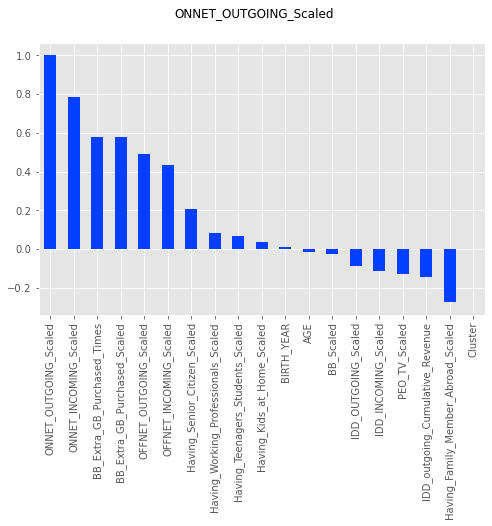

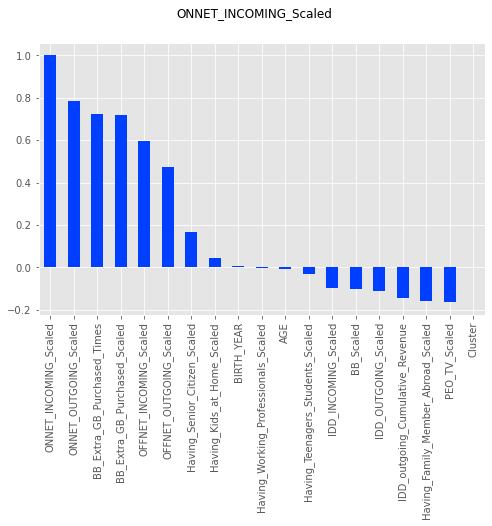

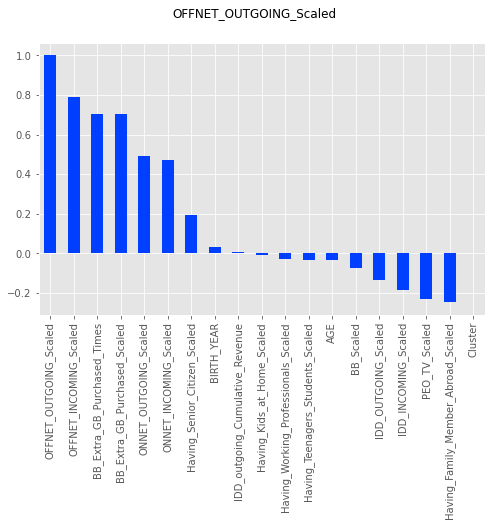

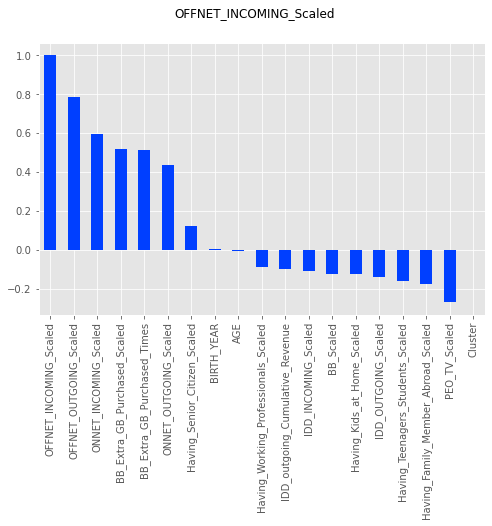

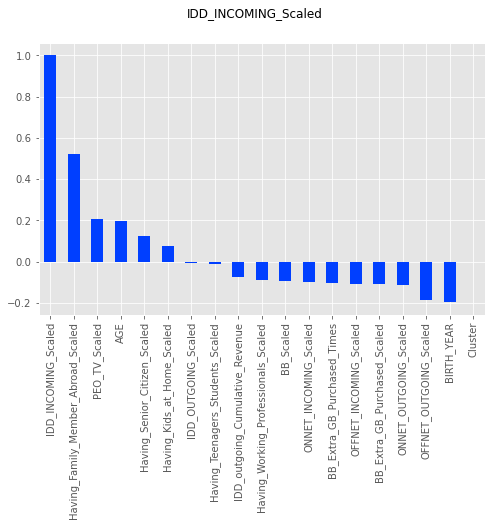

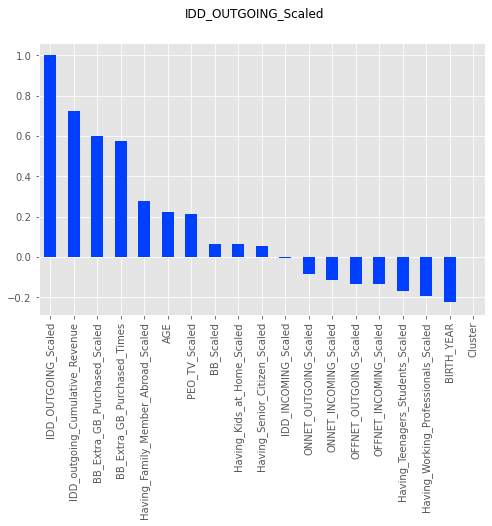

In [17]:
for col in scaled_cols:
    plt.figure(figsize=(8,5))
    plt.suptitle(col)
    cluster_2_out.corr()[col].sort_values(ascending = False).plot(kind='bar')

#### Subscriptions of Exceptional users

In [18]:
cluster_2_out_sub_df = pd.DataFrame([dict(cluster_2["Sub_Type"].value_counts()),dict(cluster_2_out["Sub_Type"].value_counts())])

In [19]:
cluster_2_out_sub_df

TRIPLE_PLAY  DOUBLE_PLAY_PV  DOUBLE_PLAY_BV  SINGLE_PLAY
0          728              84              27          8.0
1          107               8               2          NaN

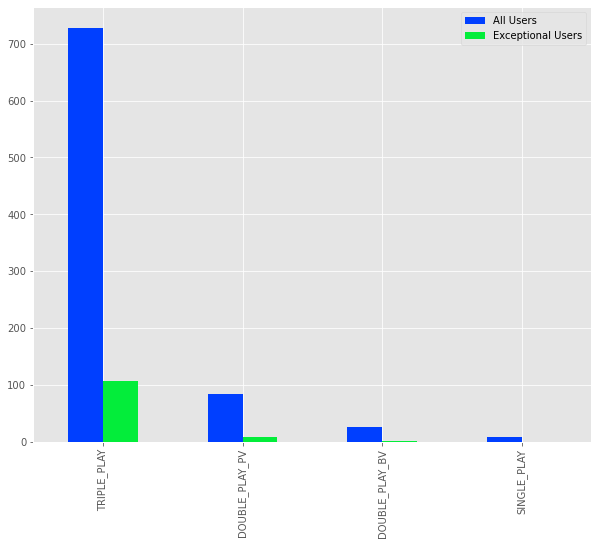

In [20]:
fig, ax = plt.subplots()
cluster_2_out_sub_df.T.plot(kind="bar", figsize=(10,8), ax=ax)
ax.legend(["All Users", "Exceptional Users"])

#### Exceptional Users by Location

<AxesSubplot:xlabel='Location_Identifier'>

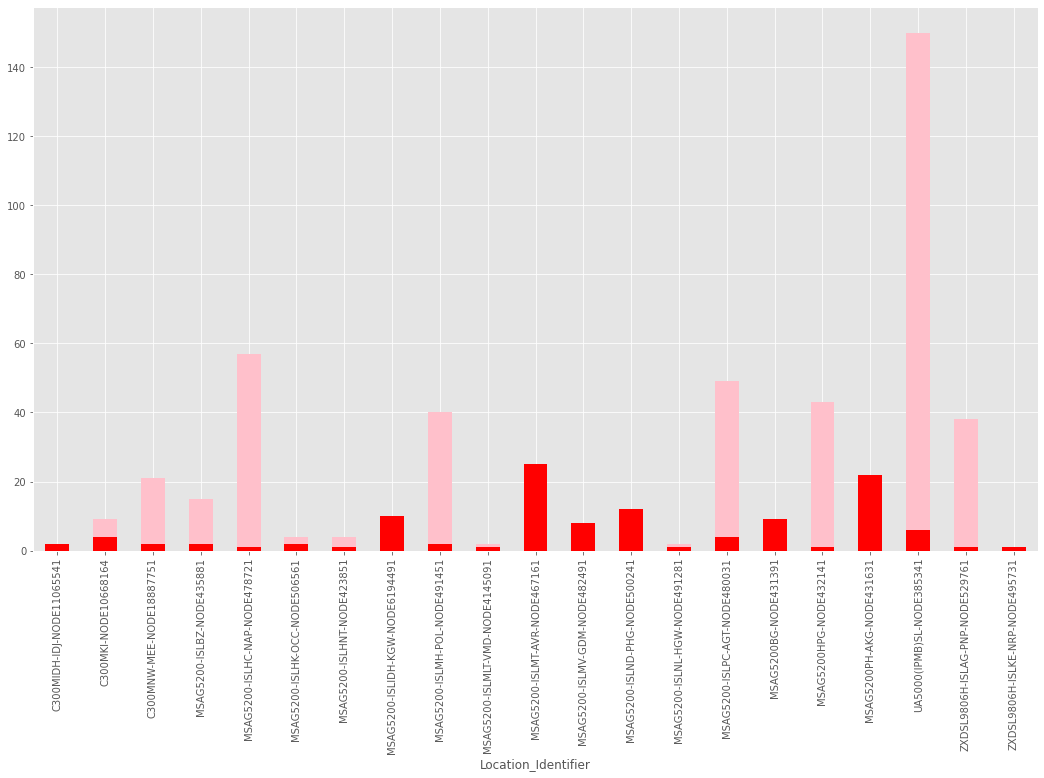

In [21]:
cluster_2_loc = cluster_2.groupby('Location_Identifier').count()["event_source.hash"]
cluster_2_out_loc = cluster_2_out.groupby('Location_Identifier').count()["event_source.hash"]
ax = cluster_2_loc.plot(stacked=True, kind="bar", figsize=(18,10), color="pink")
cluster_2_out_loc.plot(stacked=True, kind="bar",ax=ax, figsize=(18,10), color="red")

#### Skewness and Distribution

array([<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
       <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
       <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
       <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
      dtype=object)

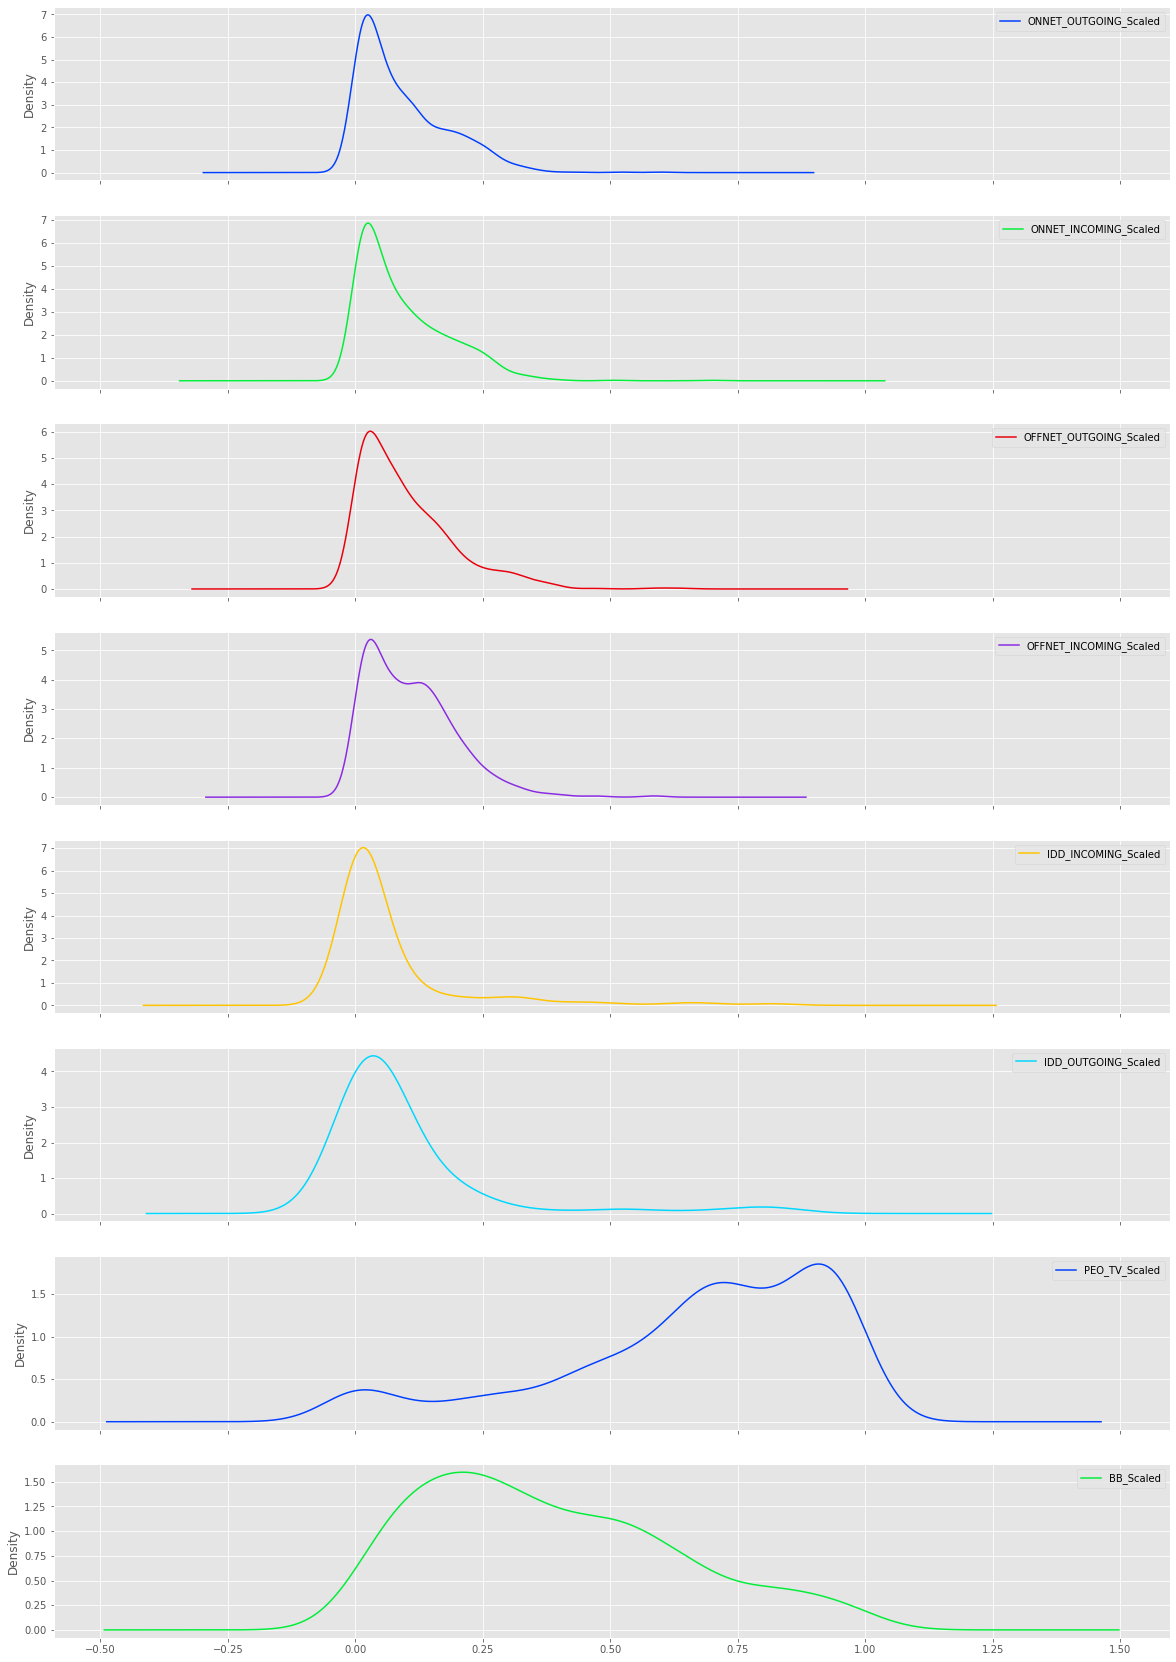

In [22]:
cluster_2.iloc[:,[4,7,10,13,16,20,26,28,62]].plot.kde(figsize=(20,30),subplots=True)

array([[<AxesSubplot:title={'center':'ONNET_OUTGOING_Scaled'}>,
        <AxesSubplot:title={'center':'ONNET_INCOMING_Scaled'}>,
        <AxesSubplot:title={'center':'OFFNET_OUTGOING_Scaled'}>,
        <AxesSubplot:title={'center':'OFFNET_INCOMING_Scaled'}>],
       [<AxesSubplot:title={'center':'IDD_INCOMING_Scaled'}>,
        <AxesSubplot:title={'center':'IDD_OUTGOING_Scaled'}>,
        <AxesSubplot:title={'center':'IDD_outgoing_Cumulative_Revenue'}>,
        <AxesSubplot:title={'center':'PEO_TV_Scaled'}>],
       [<AxesSubplot:title={'center':'BB_Scaled'}>,
        <AxesSubplot:title={'center':'BIRTH_YEAR'}>,
        <AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'BB_Extra_GB_Purchased_Times'}>],
       [<AxesSubplot:title={'center':'BB_Extra_GB_Purchased_Scaled'}>,
        <AxesSubplot:title={'center':'Having_Senior_Citizen_Scaled'}>,
        <AxesSubplot:title={'center':'Having_Kids_at_Home_Scaled'}>,
        <AxesSubplot:title={'center':'Having_Teenager

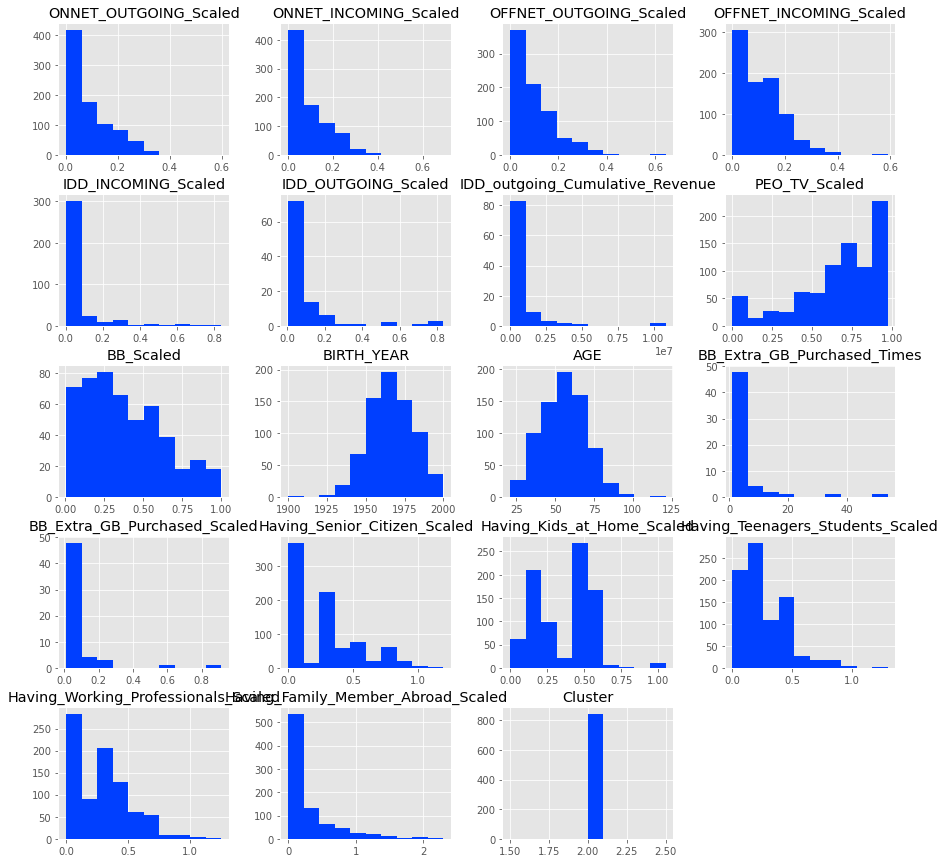

In [23]:
cluster_2.hist(figsize=(15,15))

### Subscription Type and Usage

In [24]:
cluster_2["Sub_Type"].value_counts()

TRIPLE_PLAY       728
DOUBLE_PLAY_PV     84
DOUBLE_PLAY_BV     27
SINGLE_PLAY         8
Name: Sub_Type, dtype: int64

<AxesSubplot:ylabel='Sub_Type'>

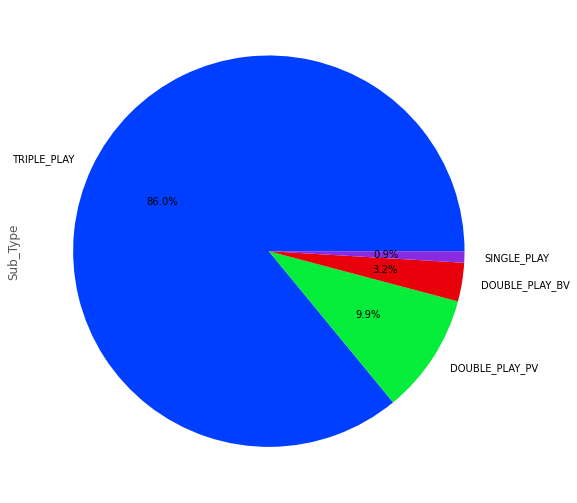

In [25]:
cluster_2["Sub_Type"].value_counts().plot(kind='pie', figsize=(9,9), autopct='%1.1f%%')

In [26]:
len(cluster_2[(cluster_2["Sub_Usage"] != "['VOICE_NO_INFO', 'BB_NO_INFO', 'TV_NO_INFO']")]["Sub_Usage"])

847

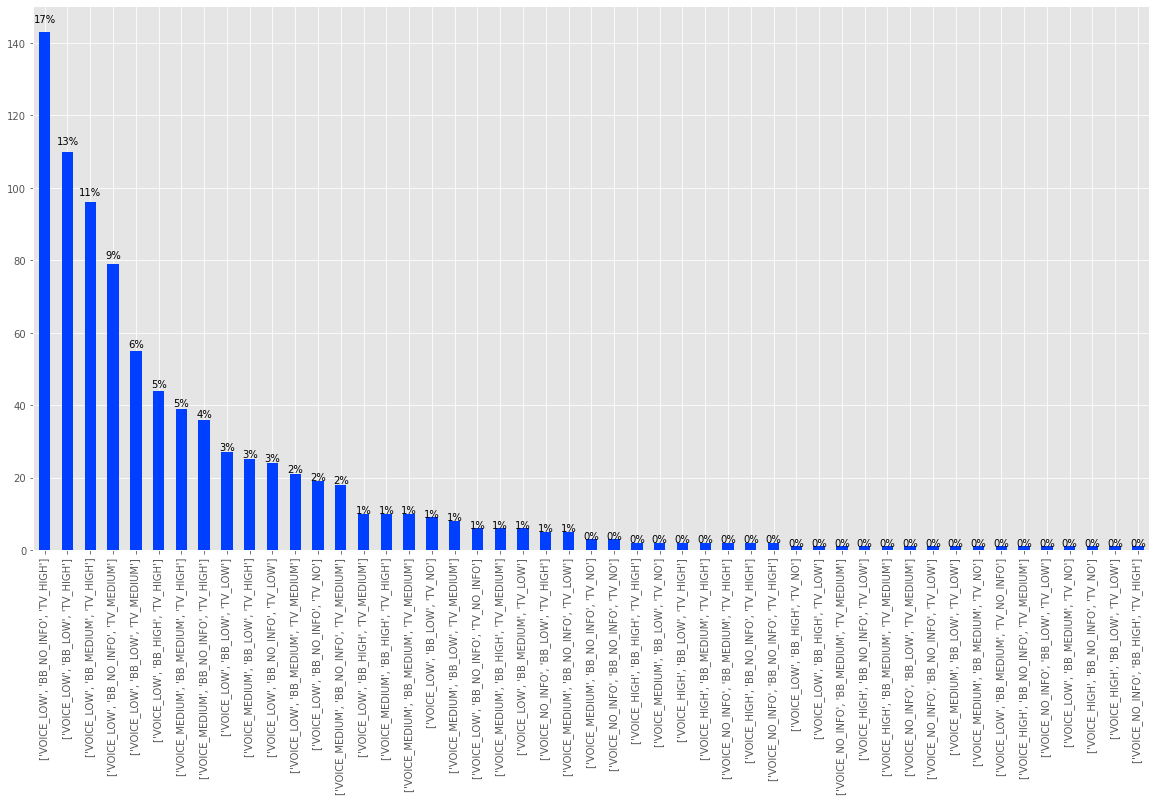

In [27]:
ax =cluster_2[(cluster_2["Sub_Usage"] != "['VOICE_NO_INFO', 'BB_NO_INFO', 'TV_NO_INFO']")]["Sub_Usage"].value_counts().plot(kind='bar', figsize=(20,10))

total_height = 0
for p in ax.patches:
    total_height = total_height + p.get_height()

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/total_height:.0%}', (x + width/2, y + height*1.02), ha='center')

### Voice Calls Usage

In [28]:
cluster_2["VOICE_Categorical"].value_counts()

LOW        653
MEDIUM     164
NO_INFO     17
HIGH        13
Name: VOICE_Categorical, dtype: int64

<AxesSubplot:ylabel='VOICE_Categorical'>

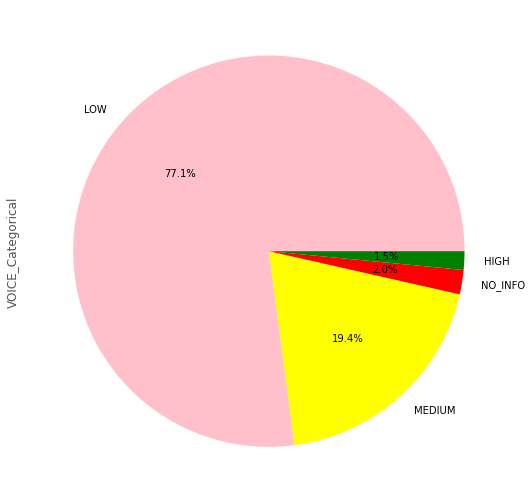

In [125]:
cluster_2["VOICE_Categorical"].value_counts().plot(kind='pie', figsize=(9,9), autopct='%1.1f%%',colors = ['pink', 'yellow','red','green'] )

### VOICE VAS Packages

In [30]:
count_dict = dict(cluster_2["Voice_VAS_Package"].value_counts())
all_products = []
for x,y in count_dict.items():
    if x != "NO_INFO":
        for item in literal_eval(x):
            for i in range(y):
                all_products.append(item)
all_voice_products_dict = Counter(all_products)

In [31]:
all_voice_products_dict.pop('V_SLT Voice Service')

751

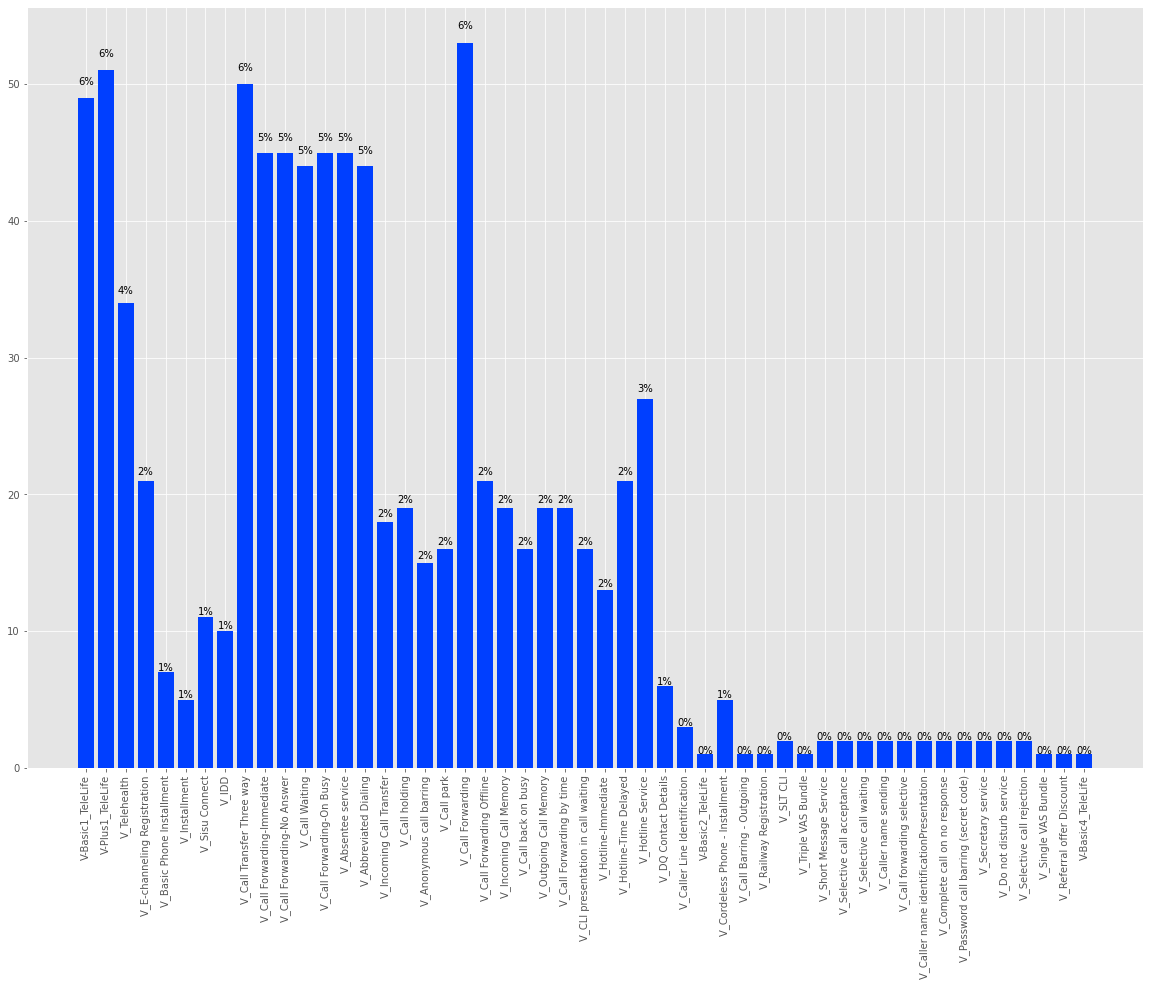

In [32]:
avp_without_no = all_voice_products_dict
#avp_without_no.pop("NO")
fig,ax = plt.subplots(figsize=(20,14))
ax.bar(*zip(*avp_without_no.items()))

total_height = 0
for p in ax.patches:
    total_height = total_height + p.get_height()

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/total_height:.0%}', (x + width/2, y + height*1.02), ha='center')

plt.xticks(rotation=90)
plt.show()

### IDD Usage

In [33]:
cluster_2["IDD_Overall_Categorical"].value_counts()

NO_INFO    463
LOW        376
MEDIUM       7
HIGH         1
Name: IDD_Overall_Categorical, dtype: int64

<AxesSubplot:ylabel='IDD_Overall_Categorical'>

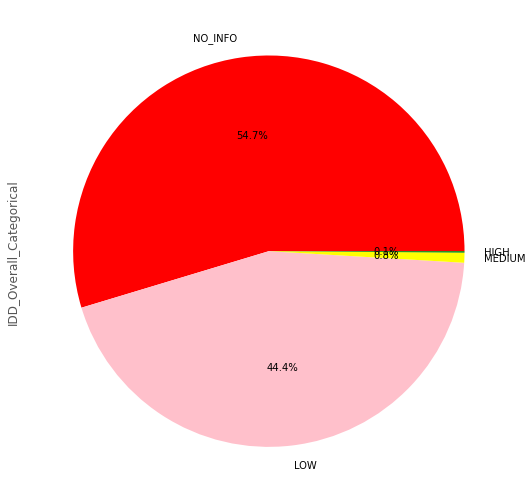

In [123]:
cluster_2["IDD_Overall_Categorical"].value_counts().plot(kind='pie', figsize=(9,9), autopct='%1.1f%%',colors = ['red','pink','yellow','green'] )

#### IDD Calling country analysis

In [35]:
def eval_country(idd_country):
    if not isinstance(idd_country, float):
        if idd_country != "NO_INFO":
            return literal_eval(idd_country)
    else:
        return []

In [36]:
cluster_2_idd_country_df = cluster_2[["event_source.hash","IDD_incoming_country"]]

In [37]:
cluster_2_idd_country_df["IDD_incoming_country"] = cluster_2_idd_country_df["IDD_incoming_country"].apply(lambda x: eval_country(x))

<ipython-input-37-2b17a12cb9b9>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [38]:
cluster_2_idd_country_df = cluster_2_idd_country_df.explode("IDD_incoming_country")

<AxesSubplot:>

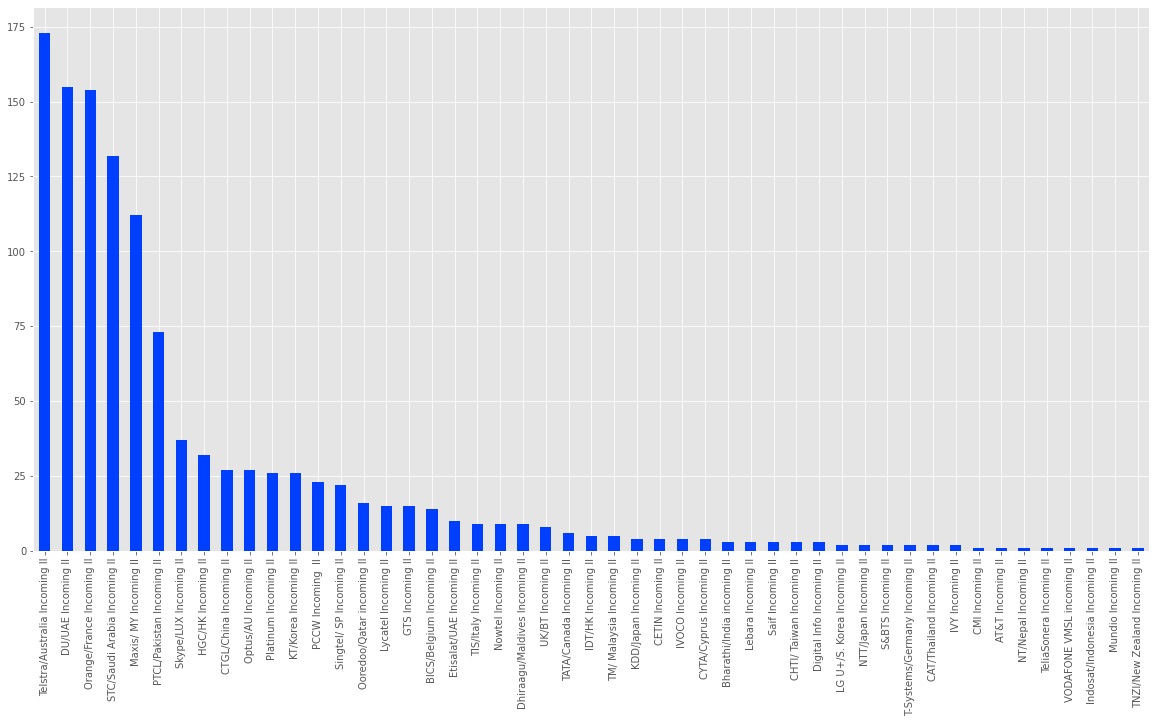

In [39]:
cluster_2_idd_country_df["IDD_incoming_country"].value_counts().plot(kind="bar", figsize=(20,10))

#### IDD Outgoing Countries

In [40]:
cluster_2_idd_out_country_df = cluster_2[["event_source.hash","IDD_outgoing_country"]]

In [41]:
cluster_2_idd_out_country_df["IDD_outgoing_country"] = cluster_2_idd_out_country_df["IDD_outgoing_country"].apply(lambda x: eval_country(x))

<ipython-input-41-c45a5d96e560>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [42]:
cluster_2_idd_out_country_df = cluster_2_idd_out_country_df.explode("IDD_outgoing_country")

In [43]:
def drop_mobile(idd_country):
    if idd_country is not None:
        if idd_country != "NO_INFO":
            return idd_country.replace(" - Mobile", "")
    else:
        return idd_country

In [44]:
cluster_2_idd_out_country_df["IDD_outgoing_country"] = cluster_2_idd_out_country_df["IDD_outgoing_country"].apply(lambda x: drop_mobile(x))

<AxesSubplot:>

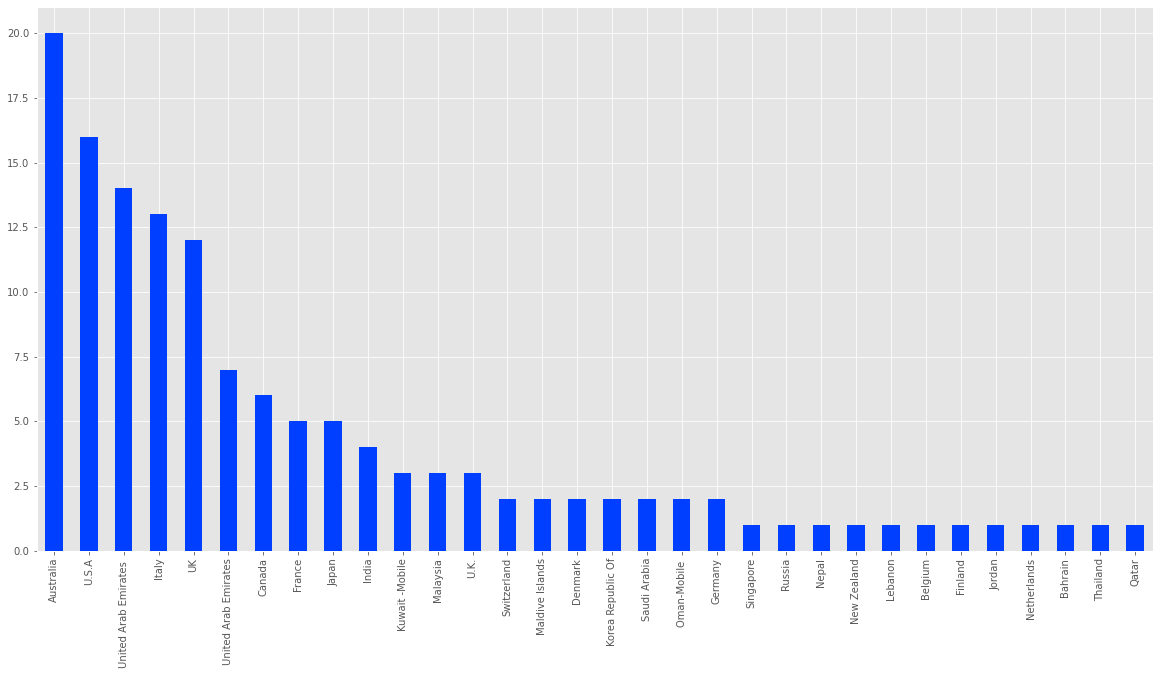

In [45]:
cluster_2_idd_out_country_df["IDD_outgoing_country"].value_counts().plot(kind="bar", figsize=(20,10))

#### IDD Rental anlysis

In [46]:
cluster_2["IDD_outgoing_Cumulative_Revenue"].value_counts()

118335.0     1
462996.0     1
4801998.0    1
45324.0      1
20400.0      1
            ..
1715.0       1
131033.0     1
45037.0      1
87900.0      1
1388.0       1
Name: IDD_outgoing_Cumulative_Revenue, Length: 100, dtype: int64

## ToDo
- Voice VAS Monthly rental/ One time charge/ subscribed timeframes analysis

### PeoTV Usage

In [47]:
cluster_2["PEO_TV_Categorical"].value_counts()

HIGH       521
MEDIUM     211
LOW         68
NO          40
NO_INFO      7
Name: PEO_TV_Categorical, dtype: int64

#### PeoTV Usage among Triple Play users in Cluster 2

<AxesSubplot:ylabel='PEO_TV_Categorical'>

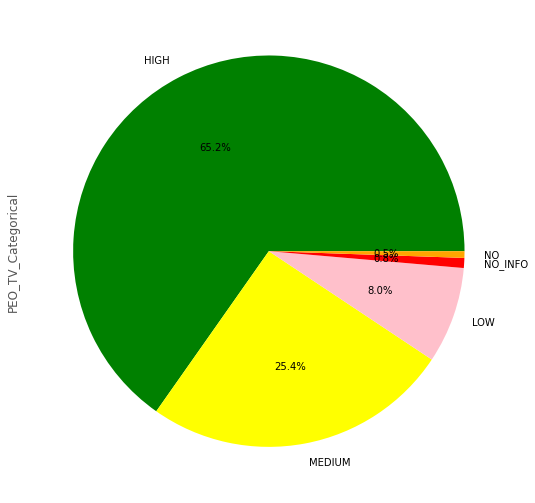

In [48]:
cluster_2_peo = cluster_2[(cluster_2["Sub_Type"] == "TRIPLE_PLAY")]
cluster_2_peo["PEO_TV_Categorical"].value_counts().plot(kind='pie', figsize=(9,9), autopct='%1.1f%%',colors = ['green','yellow','pink','red','orange'])

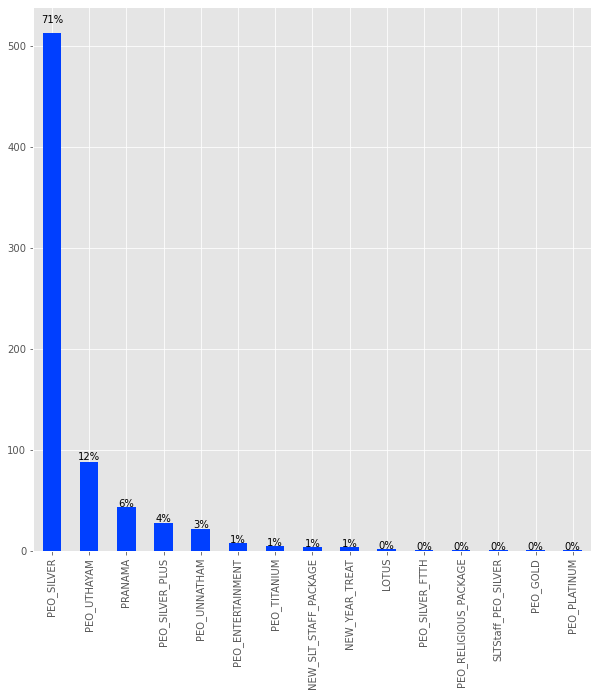

In [49]:
ax =cluster_2_peo[(cluster_2_peo["Peo_TV_Package"] != "NO_INFO")]["Peo_TV_Package"].value_counts().plot(kind='bar', figsize=(10,10))

total_height = 0
for p in ax.patches:
    total_height = total_height + p.get_height()

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/total_height:.0%}', (x + width/2, y + height*1.02), ha='center')

#### PeoTV Usage among Double Play PV users in Cluster 2

<AxesSubplot:ylabel='PEO_TV_Categorical'>

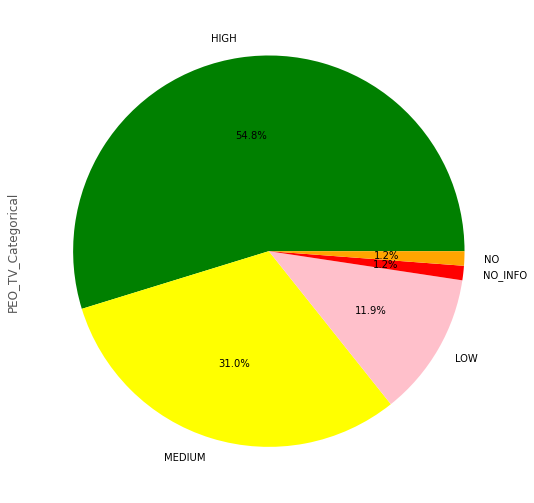

In [50]:
cluster_2_peo_pv = cluster_2[(cluster_2["Sub_Type"] == "DOUBLE_PLAY_PV")]
cluster_2_peo_pv["PEO_TV_Categorical"].value_counts().plot(kind='pie', figsize=(9,9), autopct='%1.1f%%',colors = ['green','yellow','pink','red','orange'])

In [51]:
cluster_2_peo_pv["PEO_TV_Categorical"].value_counts()

HIGH       46
MEDIUM     26
LOW        10
NO_INFO     1
NO          1
Name: PEO_TV_Categorical, dtype: int64

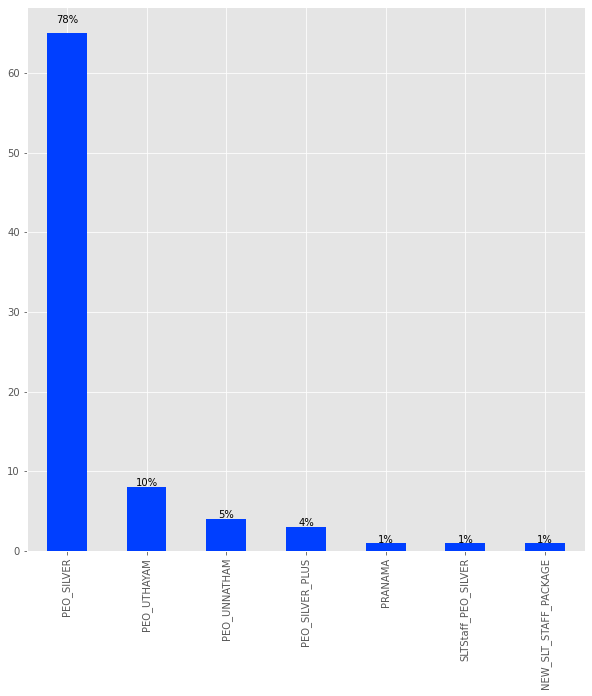

In [52]:
ax =cluster_2_peo_pv[(cluster_2_peo_pv["Peo_TV_Package"] != "NO_INFO")]["Peo_TV_Package"].value_counts().plot(kind='bar', figsize=(10,10))

total_height = 0
for p in ax.patches:
    total_height = total_height + p.get_height()

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/total_height:.0%}', (x + width/2, y + height*1.02), ha='center')

### PEO TV VAS Packages

In [53]:
count_dict = dict(cluster_2["Peo_VAS_Package"].value_counts())
all_products = []
for x,y in count_dict.items():
    if x != "NO_INFO":
        for item in literal_eval(x):
            for i in range(y):
                all_products.append(item)
all_peo_products_dict = Counter(all_products)

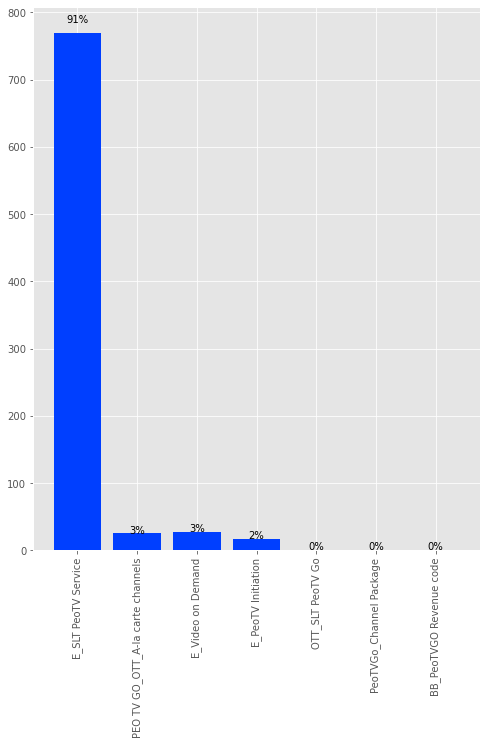

In [54]:
avp_without_no = all_peo_products_dict
#avp_without_no.pop("NO")
fig,ax = plt.subplots(figsize=(8,10))
ax.bar(*zip(*avp_without_no.items()))

total_height = 0
for p in ax.patches:
    total_height = total_height + p.get_height()

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/total_height:.0%}', (x + width/2, y + height*1.02), ha='center')

plt.xticks(rotation=90)
plt.show()

## ToDo
- Peo VAS Monthly rental/ One time charge/ subscribed timeframes analysis

### BroadBand Internet Usage

In [55]:
cluster_2["BB_Categorical"].value_counts()

NO_INFO    344
LOW        247
MEDIUM     181
HIGH        75
Name: BB_Categorical, dtype: int64

#### BB Usage for triple Play users in Cluster 2

<AxesSubplot:ylabel='BB_Categorical'>

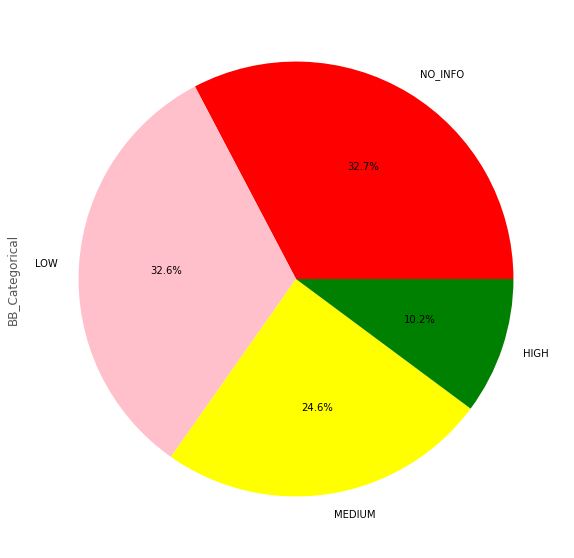

In [56]:
cluster_2_bb = cluster_2[(cluster_2["Sub_Type"] == "TRIPLE_PLAY")]
cluster_2_bb["BB_Categorical"].value_counts().plot(kind='pie', figsize=(10,10), autopct='%1.1f%%',colors = ['red','pink','yellow','green'])

#### BB Usage for Double Play BV Customers in Cluster 2

<AxesSubplot:ylabel='BB_Categorical'>

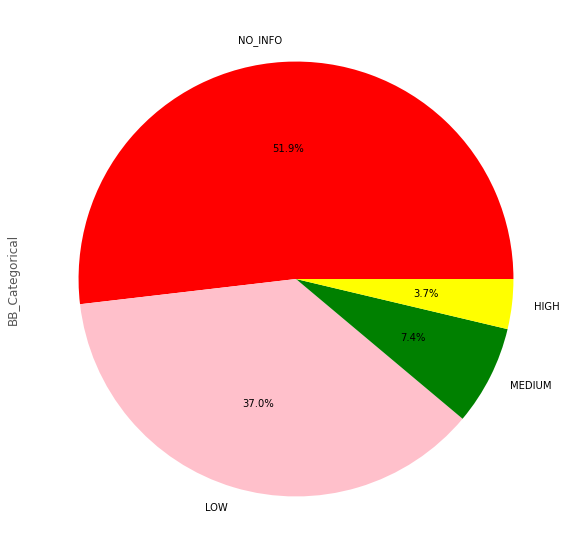

In [57]:
cluster_2_bb_dp = cluster_2[(cluster_2["Sub_Type"] == "DOUBLE_PLAY_BV")]
cluster_2_bb_dp["BB_Categorical"].value_counts().plot(kind='pie', figsize=(10,10), autopct='%1.1f%%',colors = ['red','pink','green','yellow'])

### BB VAS Package

In [58]:
count_dict = dict(cluster_2["BB_VAS_Package"].value_counts())
all_products = []
for x,y in count_dict.items():
    if x != "NO_INFO":
        for item in literal_eval(x):
            for i in range(y):
                all_products.append(item)
all_bb_products_dict = Counter(all_products)

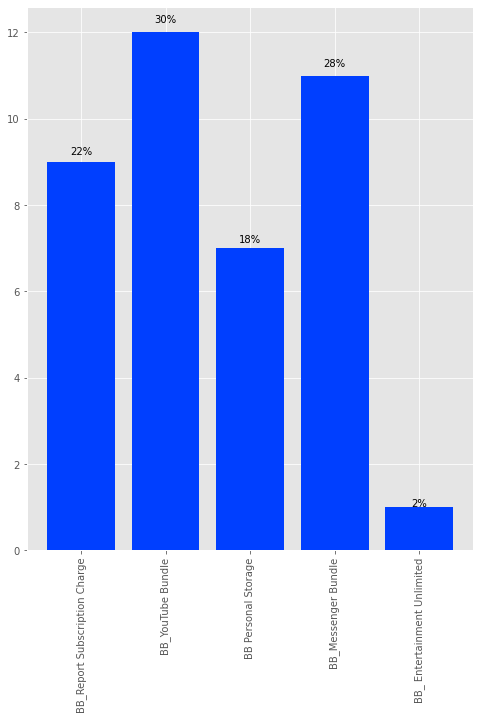

In [59]:
avp_without_no = all_bb_products_dict
#avp_without_no.pop("NO")
fig,ax = plt.subplots(figsize=(8,10))
ax.bar(*zip(*avp_without_no.items()))

total_height = 0
for p in ax.patches:
    total_height = total_height + p.get_height()

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/total_height:.0%}', (x + width/2, y + height*1.02), ha='center')

plt.xticks(rotation=90)
plt.show()

## ToDo
- BB VAS Monthly rental/ One time charge/ subscribed timeframes analysis

### Extra Gb Usage Analysis

#### Most Extra GB Purchased users - by frequency

In [60]:
extra_gb_freq_users = cluster_2[(cluster_2["BB_Extra_GB_Purchased_Times"]>10.0)]

In [61]:
extra_gb_mostly_used_users = extra_gb_freq_users["event_source.hash"]

<AxesSubplot:ylabel='BB_Extra_GB_Purchase_Categorical'>

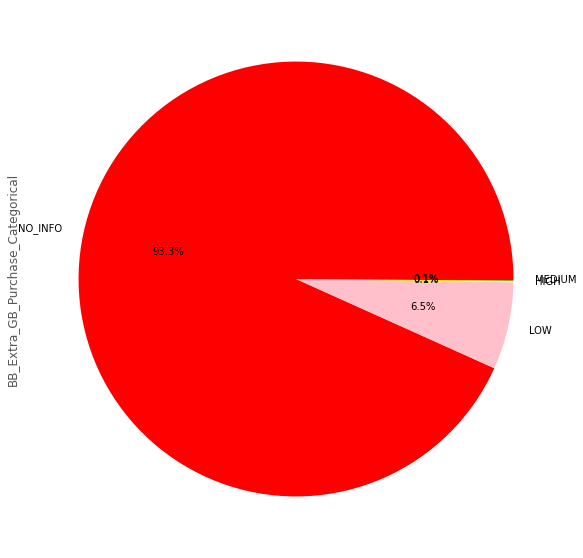

In [62]:
cluster_2["BB_Extra_GB_Purchase_Categorical"].value_counts().plot(kind='pie', figsize=(10,10), autopct='%1.1f%%',colors = ['red','pink','yellow','green'])

[Text(0, 0, '2ff128681d50b67ecd45f799b056d86c'),
 Text(1, 0, '415b0e44ede662b30ab7ad41e1aa55b2'),
 Text(2, 0, 'b35be8dc64bf972ce4b96292f16577b5'),
 Text(3, 0, 'cf3f41d850ff9594bec1caf03db53fd3'),
 Text(4, 0, '02ab436dc7b5a63579a44641db682ab1'),
 Text(5, 0, '18191da190fc76c860e699d6cc810cf6')]

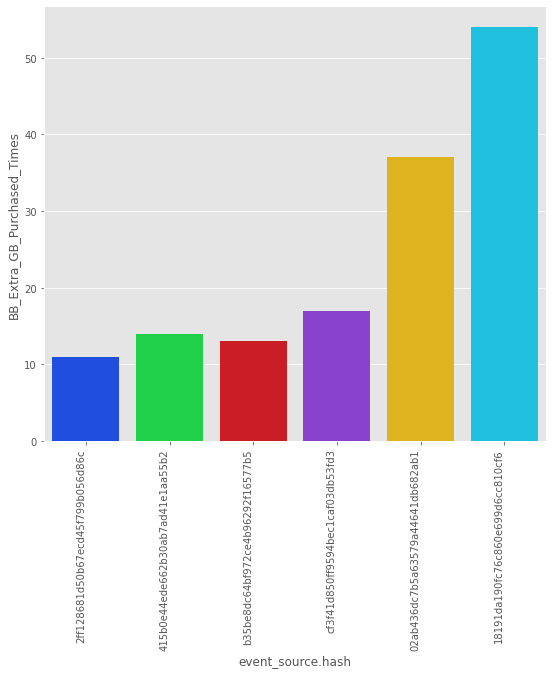

In [63]:
plt.figure(figsize=(9,8))
extra_gb_bar_plot = sns.barplot(data=extra_gb_freq_users,x='event_source.hash', y='BB_Extra_GB_Purchased_Times')

extra_gb_bar_plot.set_xticklabels(extra_gb_bar_plot.get_xticklabels(), 
                          rotation=90, 
                          horizontalalignment='right')

#### Most Extra GB Useed users - By spent amount with Time

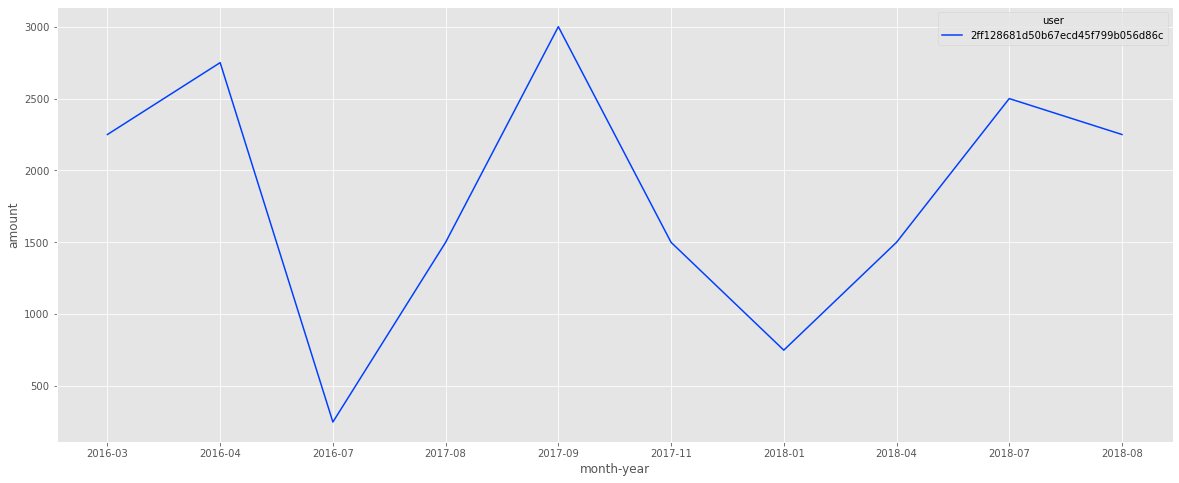

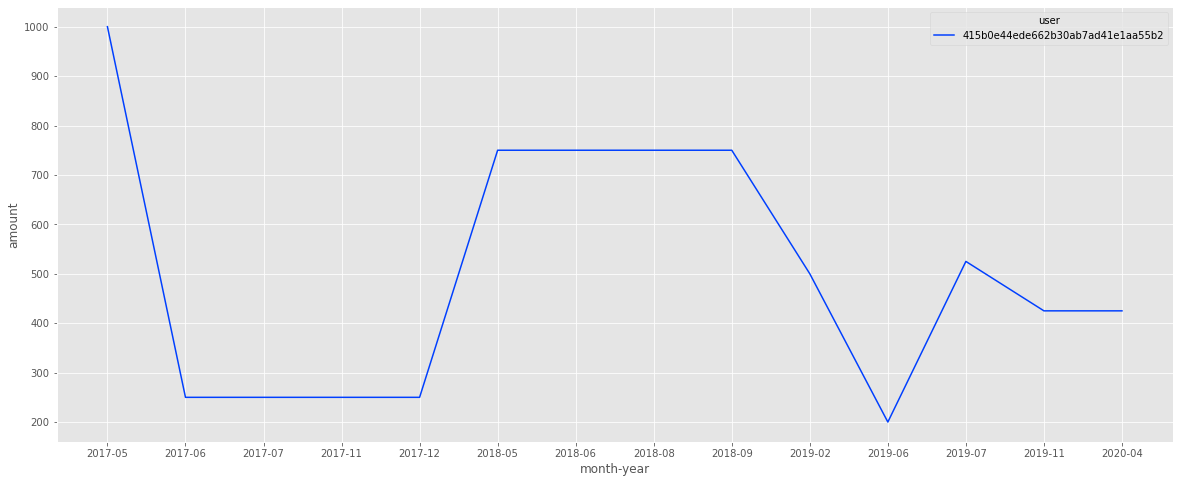

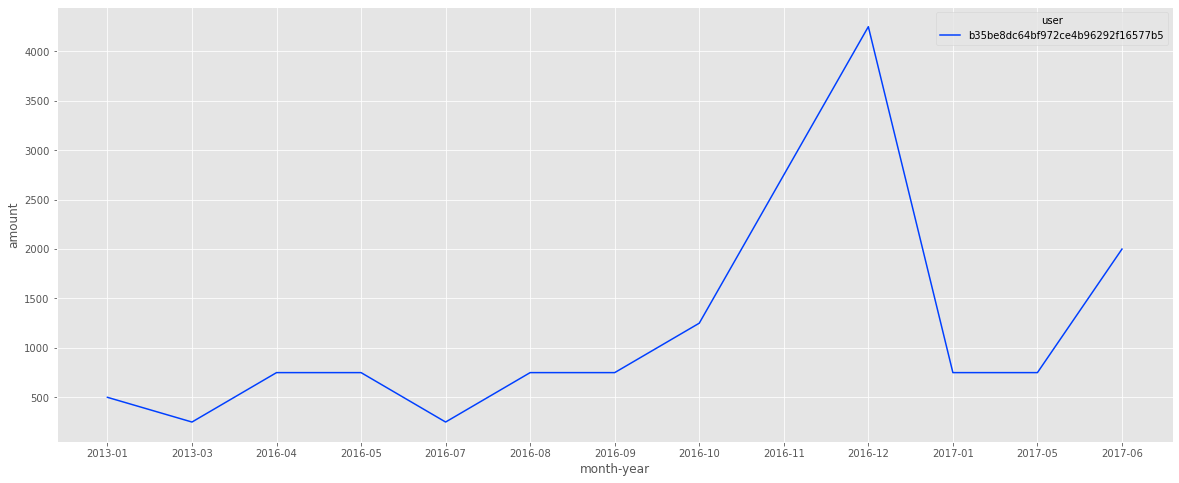

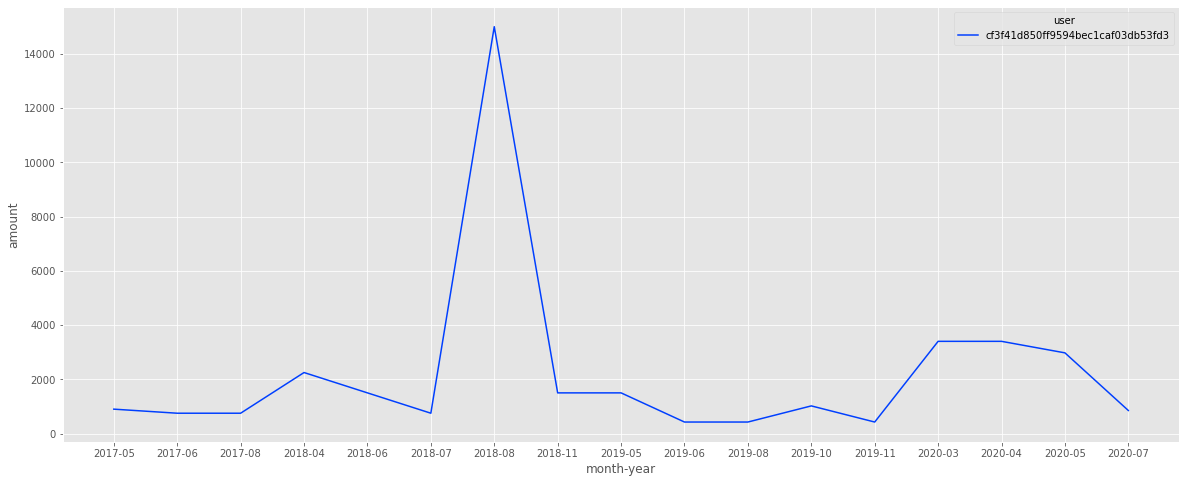

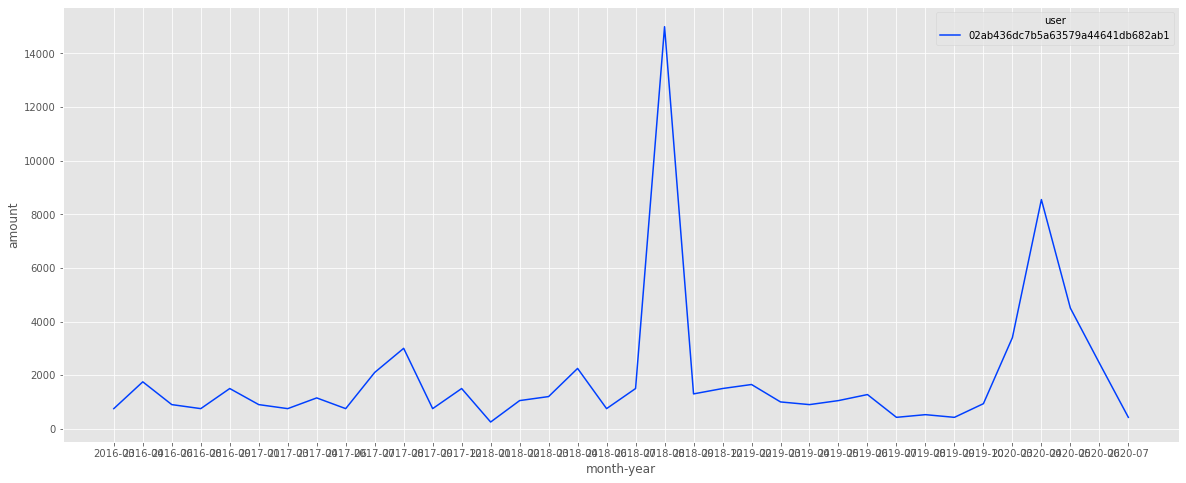

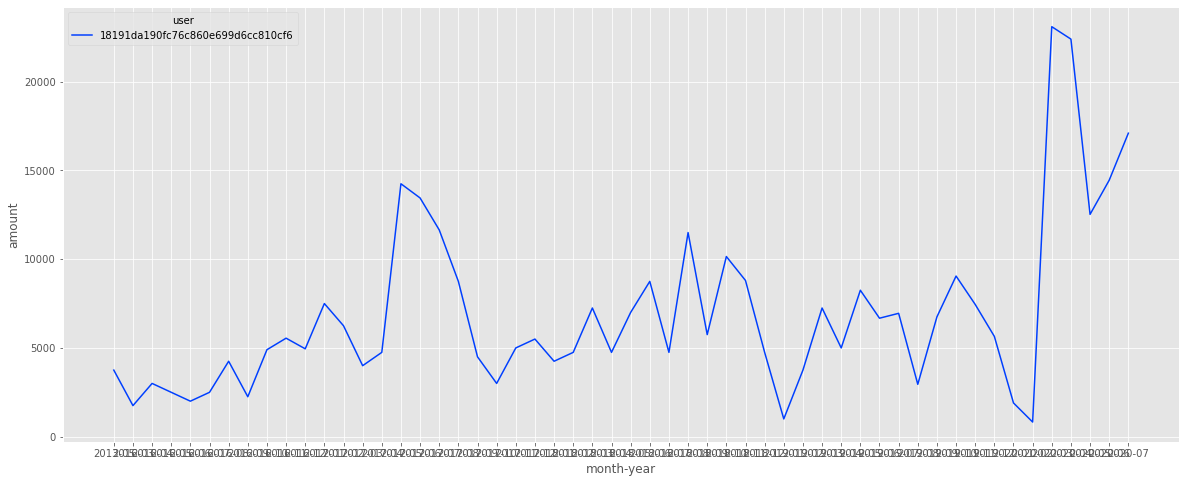

In [64]:

for user in extra_gb_mostly_used_users:
    user_usage_dict = extra_gb_freq_users[(extra_gb_freq_users["event_source.hash"]==user)]["BB_Extra_GB_Month_vs_Rental"].tolist()[0]
    if not isinstance (user_usage_dict, float) or user_usage_dict != "NO_INFO":
        user_usage_df =  pd.DataFrame(literal_eval(user_usage_dict).items(), columns=["month-year","amount"])
        user_usage_df["user"] = user
        user_usage_df.sort_values('month-year', inplace=True)
        plt.figure(figsize=(20,8))
        sns.lineplot(data=user_usage_df,hue='user',x='month-year', y='amount')
        

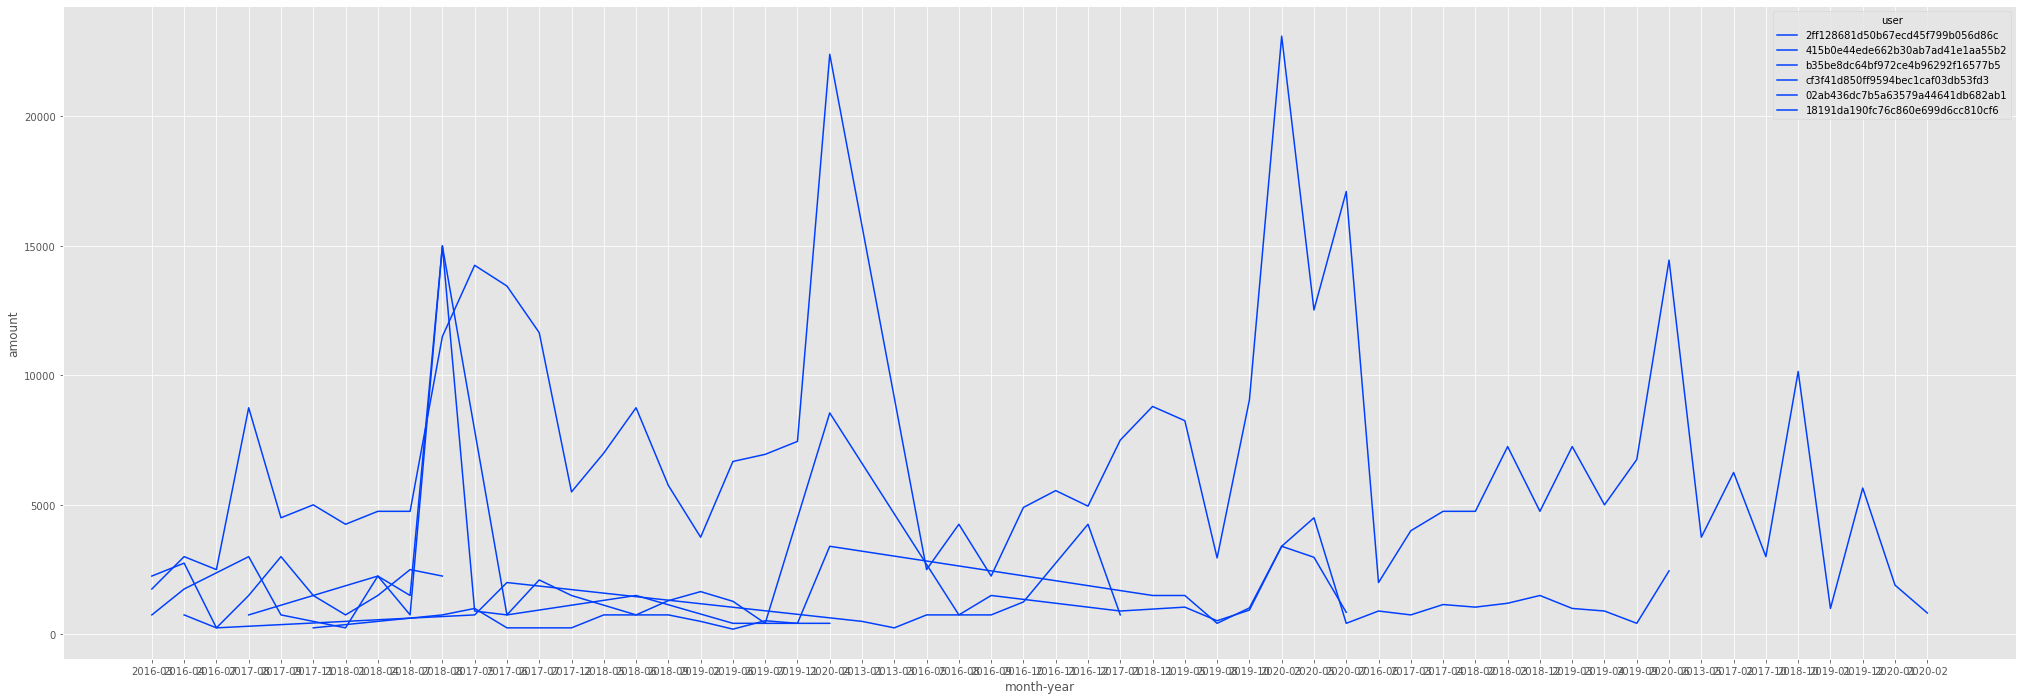

In [65]:
plt.figure(figsize=(35,12))
for user in extra_gb_mostly_used_users:
    user_usage_dict = extra_gb_freq_users[(extra_gb_freq_users["event_source.hash"]==user)]["BB_Extra_GB_Month_vs_Rental"].tolist()[0]
    if not isinstance (user_usage_dict, float) or user_usage_dict != "NO_INFO":
        user_usage_df =  pd.DataFrame(literal_eval(user_usage_dict).items(), columns=["month-year","amount"])
        user_usage_df["user"] = user
        user_usage_df.sort_values('month-year',inplace=True)
        sns.lineplot(data=user_usage_df,hue='user',x='month-year', y='amount')

## User Location

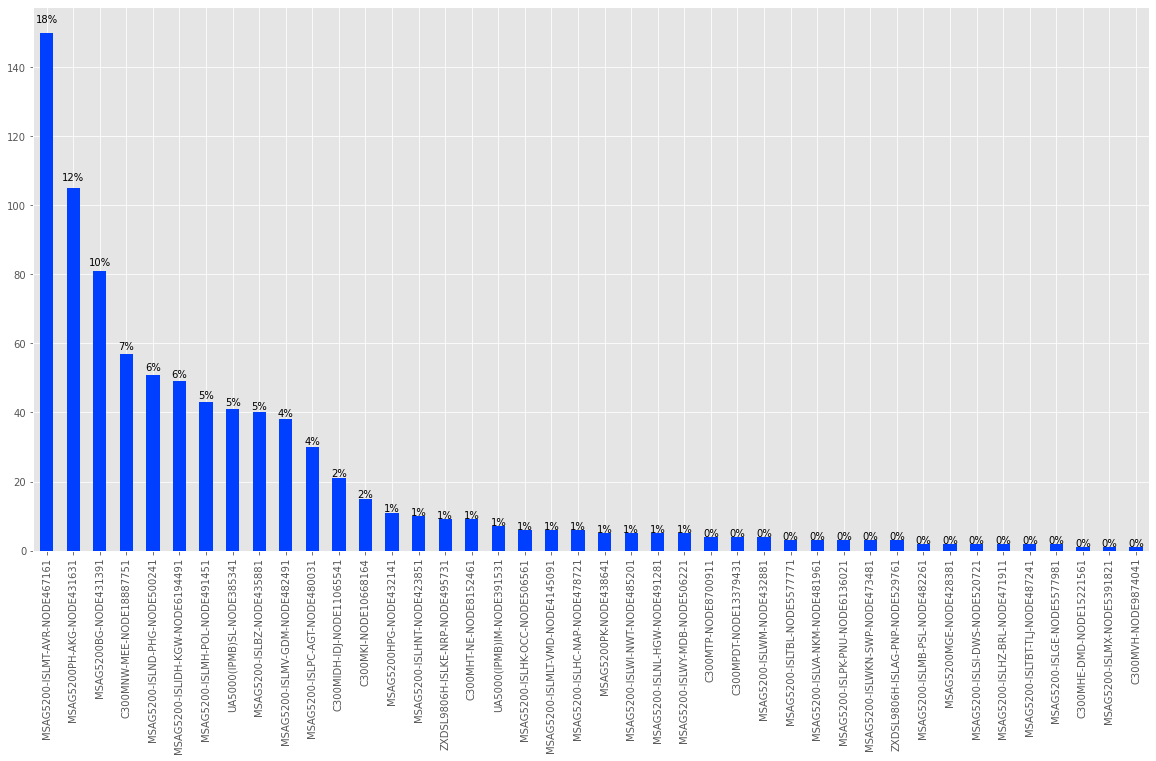

In [66]:
ax =cluster_2["Location_Identifier"].value_counts().plot(kind='bar', figsize=(20,10))

total_height = 0
for p in ax.patches:
    total_height = total_height + p.get_height()

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/total_height:.0%}', (x + width/2, y + height*1.02), ha='center')

#### User locations of Triply play customers

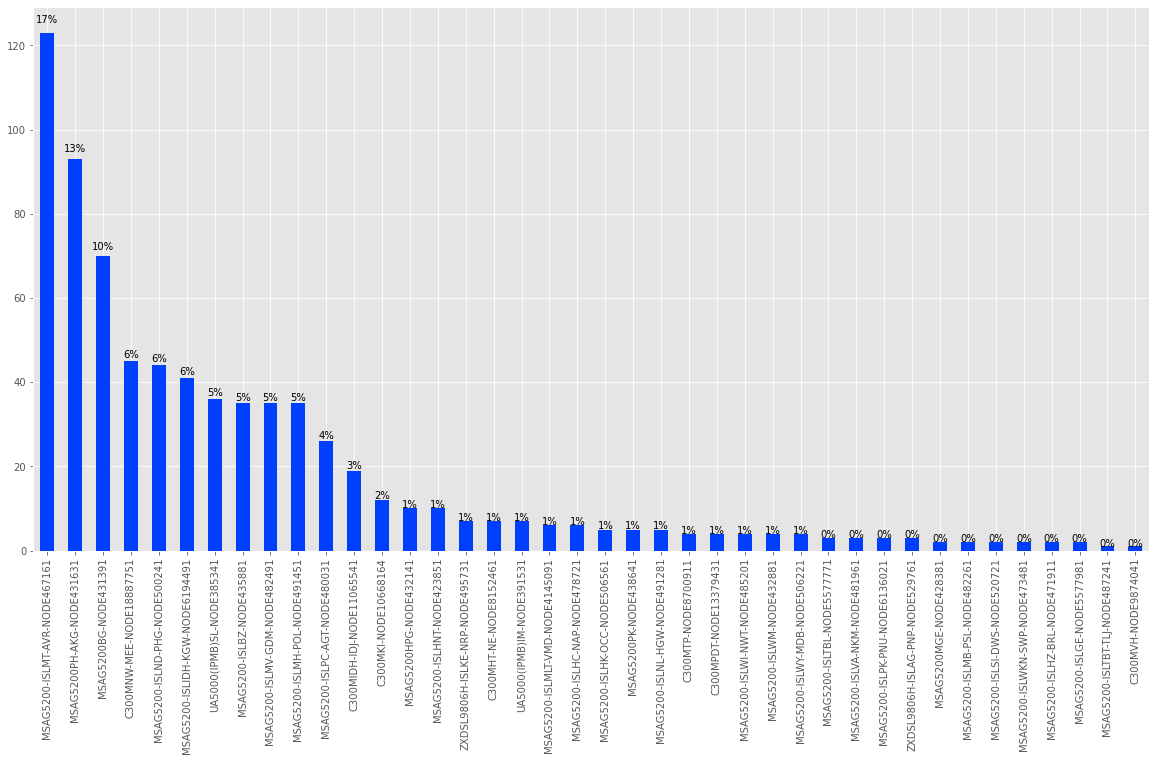

In [67]:
ax =cluster_2_peo["Location_Identifier"].value_counts().plot(kind='bar', figsize=(20,10))

total_height = 0
for p in ax.patches:
    total_height = total_height + p.get_height()

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/total_height:.0%}', (x + width/2, y + height*1.02), ha='center')

#### User locations of double play PV customers

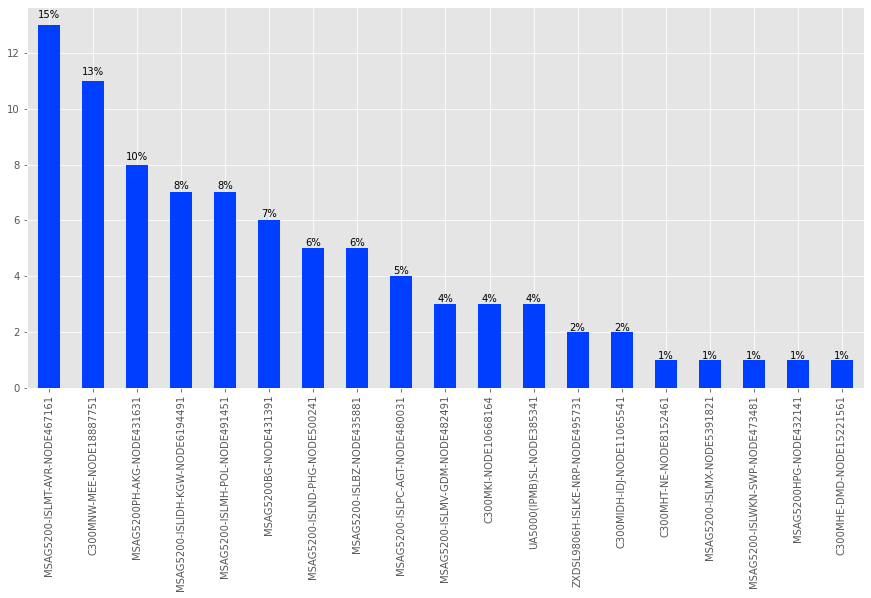

In [68]:
ax =cluster_2_peo_pv["Location_Identifier"].value_counts().plot(kind='bar', figsize=(15,7))

total_height = 0
for p in ax.patches:
    total_height = total_height + p.get_height()

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/total_height:.0%}', (x + width/2, y + height*1.02), ha='center')

#### User locations of double play BV customers

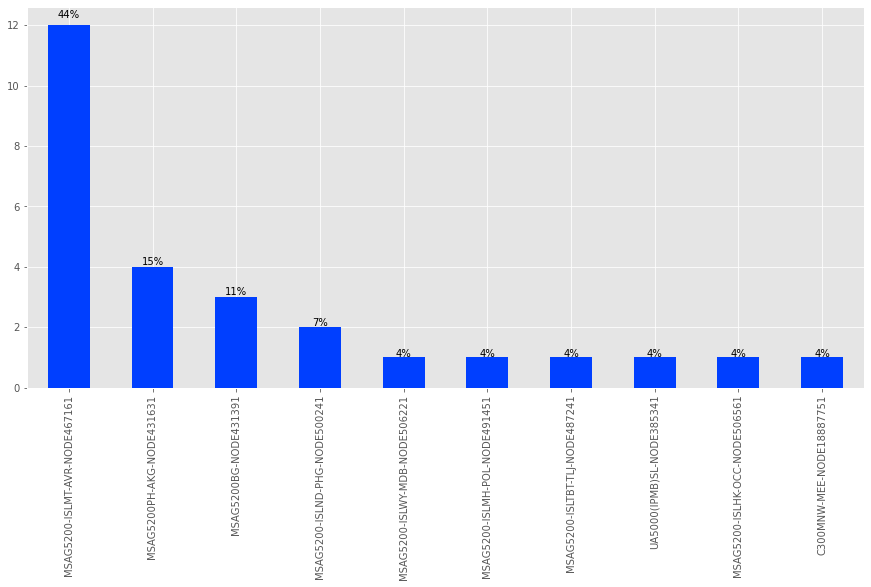

In [69]:
ax =cluster_2_bb_dp["Location_Identifier"].value_counts().plot(kind='bar', figsize=(15,7))

total_height = 0
for p in ax.patches:
    total_height = total_height + p.get_height()

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/total_height:.0%}', (x + width/2, y + height*1.02), ha='center')

#### IDD Usage among locations

<AxesSubplot:xlabel='Location_Identifier'>

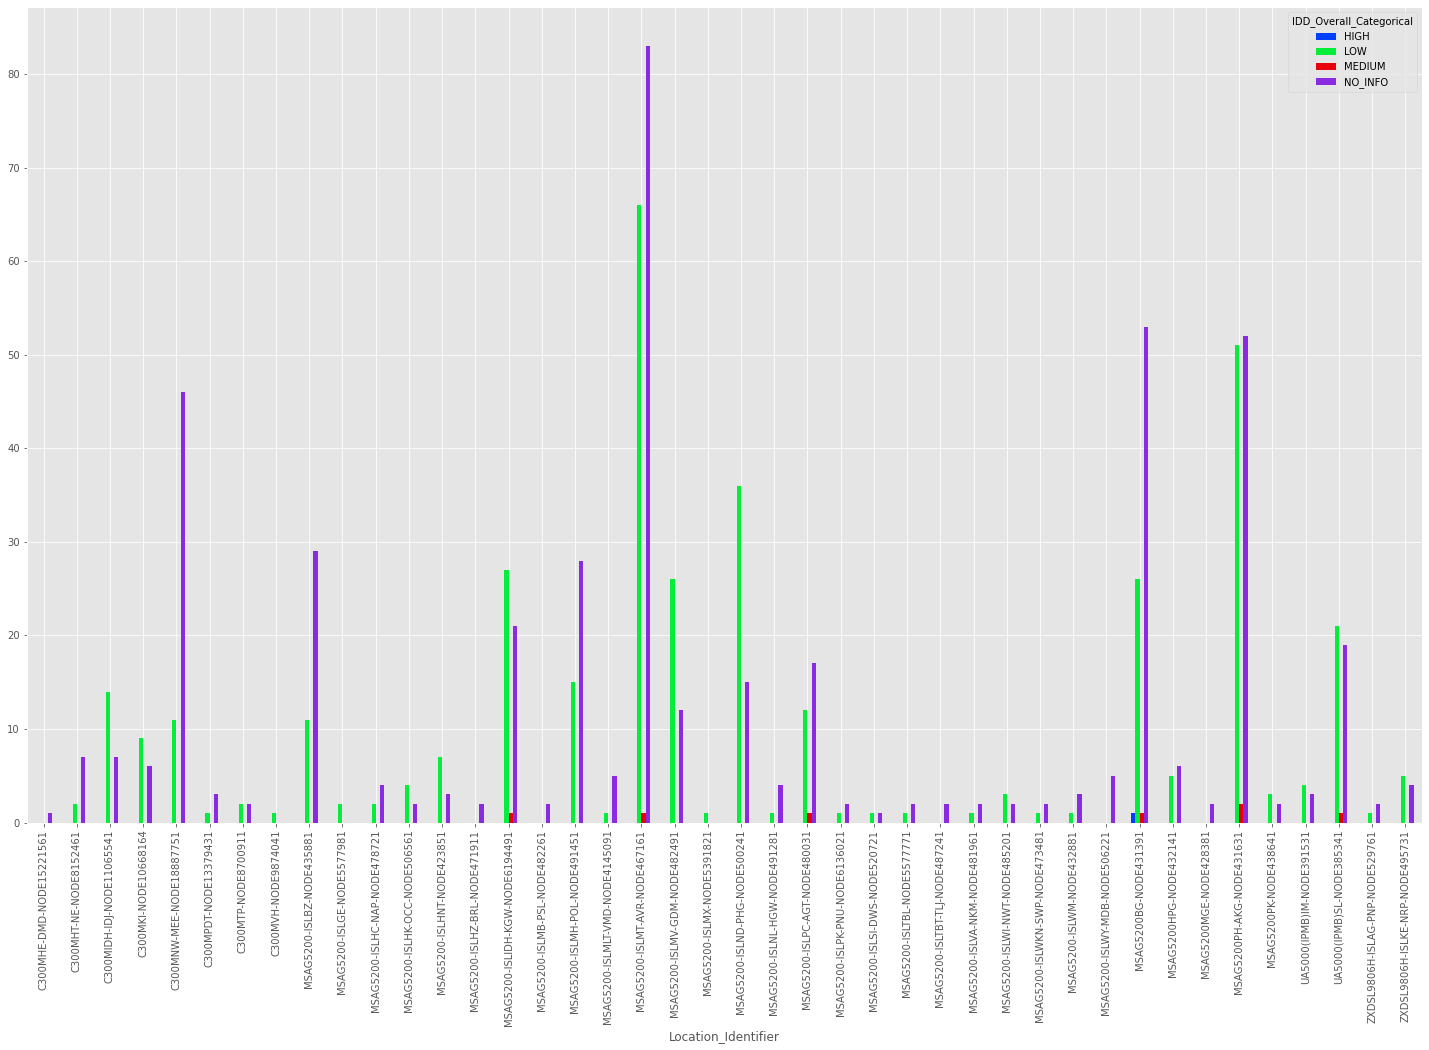

In [70]:
#ax =cluster_2[["IDD_Overall_Categorical","Location_Identifier"]].value_counts().plot(kind='bar', figsize=(15,7))

cluster_2[(cluster_2["Location_Identifier"] != "NO_INFO")].groupby(["Location_Identifier","IDD_Overall_Categorical"]).size().unstack().plot.bar(figsize=(25,15))

#### Peo TV Usage among locations

<ipython-input-71-8ef7935e88e7>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



[Text(0, 0, 'MSAG5200-ISLWI-NWT-NODE485201'),
 Text(1, 0, 'MSAG5200-ISLHK-OCC-NODE506561'),
 Text(2, 0, 'MSAG5200-ISLIDH-KGW-NODE6194491'),
 Text(3, 0, 'MSAG5200-ISLHC-NAP-NODE478721'),
 Text(4, 0, 'C300MIDH-IDJ-NODE11065541'),
 Text(5, 0, 'MSAG5200-ISLND-PHG-NODE500241'),
 Text(6, 0, 'MSAG5200-ISLSI-DWS-NODE520721'),
 Text(7, 0, 'MSAG5200-ISLMV-GDM-NODE482491'),
 Text(8, 0, 'MSAG5200PK-NODE438641'),
 Text(9, 0, 'MSAG5200-ISLPK-PNU-NODE6136021'),
 Text(10, 0, 'C300MKI-NODE10668164'),
 Text(11, 0, 'MSAG5200-ISLMLT-VMD-NODE4145091'),
 Text(12, 0, 'MSAG5200-ISLMB-PSL-NODE482261'),
 Text(13, 0, 'MSAG5200-ISLVA-NKM-NODE481961'),
 Text(14, 0, 'MSAG5200-ISLTBT-TLJ-NODE487241'),
 Text(15, 0, 'MSAG5200-ISLWKN-SWP-NODE473481'),
 Text(16, 0, 'UA5000(IPMB)SL-NODE385341'),
 Text(17, 0, 'MSAG5200-ISLMX-NODE5391821'),
 Text(18, 0, 'MSAG5200-ISLGE-NODE5577981'),
 Text(19, 0, 'MSAG5200-ISLPC-AGT-NODE480031'),
 Text(20, 0, 'MSAG5200HPG-NODE432141'),
 Text(21, 0, 'MSAG5200MGE-NODE428381'),
 Text(22, 0, '

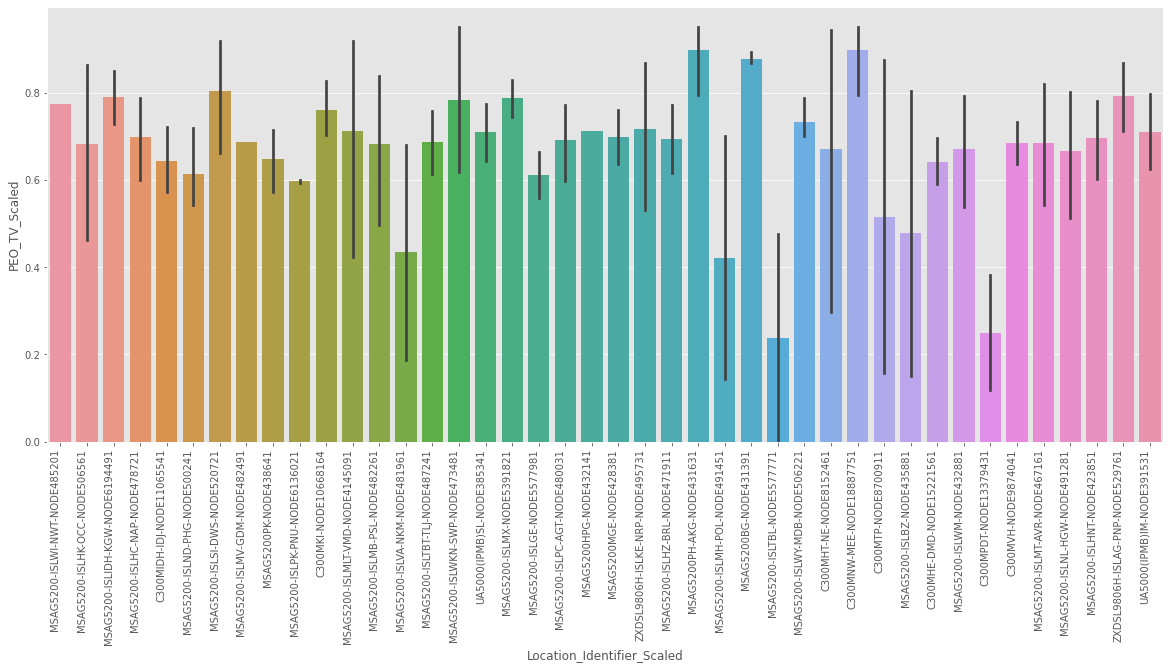

In [71]:
plt.figure(figsize=(20,8))
location_peo_df = cluster_2[["event_source.hash","Location_Identifier","PEO_TV_Scaled"]]
location_peo_df["Location_Identifier_Scaled"] = location_peo_df["Location_Identifier"].astype("category").cat.codes
loc_peo_bar_plot = sns.barplot(data=location_peo_df,x='Location_Identifier_Scaled', y='PEO_TV_Scaled')

loc_peo_bar_plot.set_xticklabels(location_peo_df["Location_Identifier"].unique(), 
                          rotation=90, 
                          horizontalalignment='right')

#### Popularity of PeoTV Packages among Locations

In [72]:
location_arr = cluster_2["Location_Identifier"].unique()

<ipython-input-73-4090007e361e>:3: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



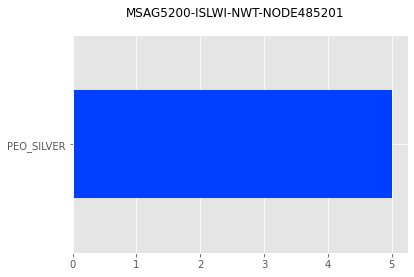

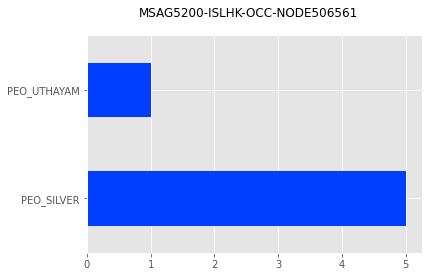

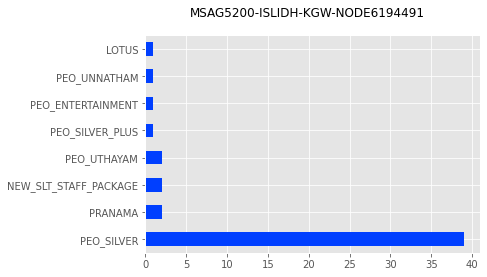

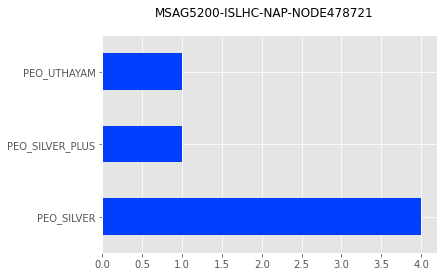

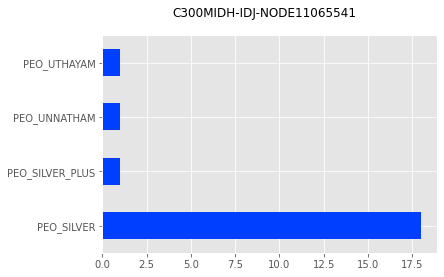

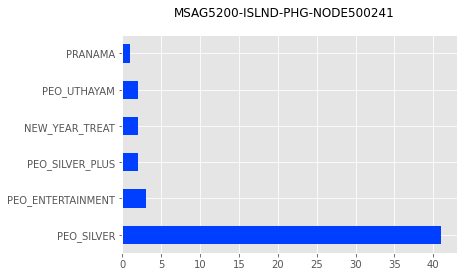

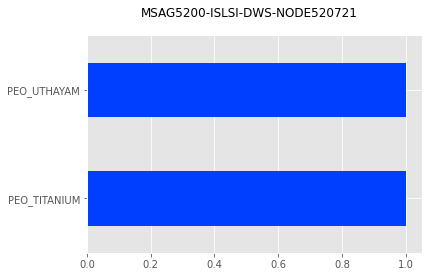

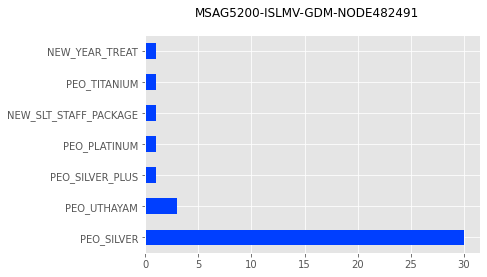

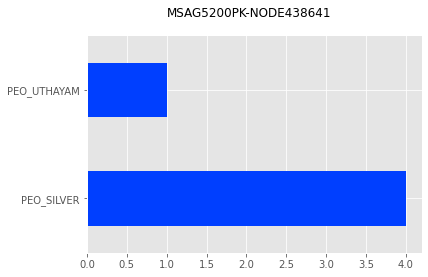

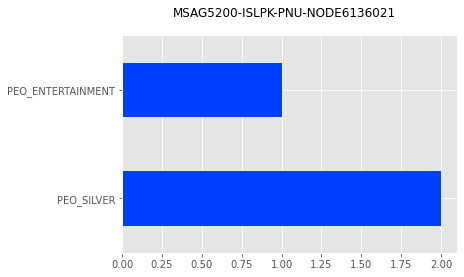

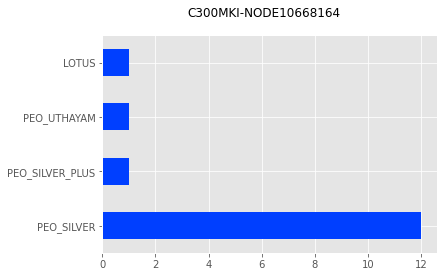

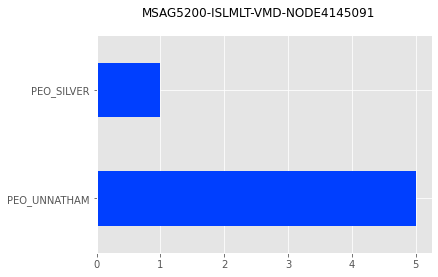

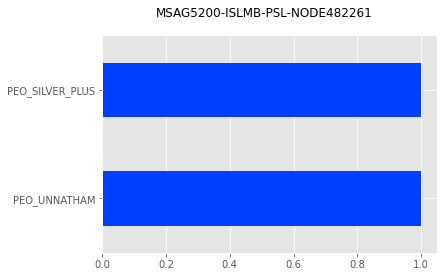

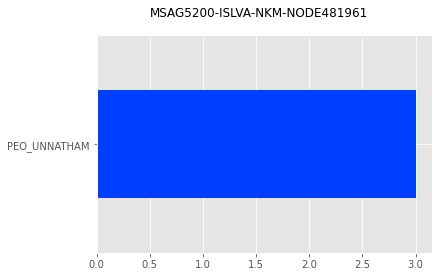

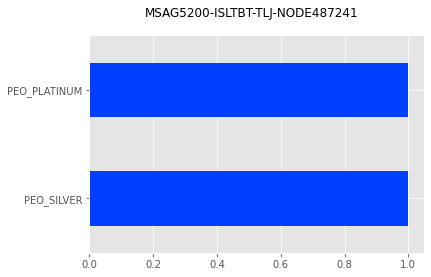

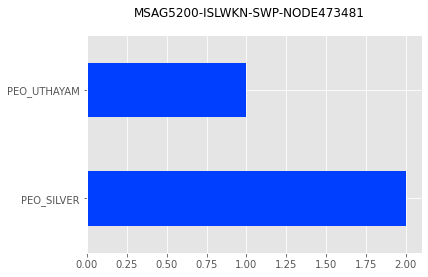

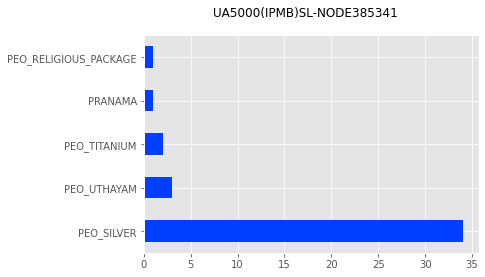

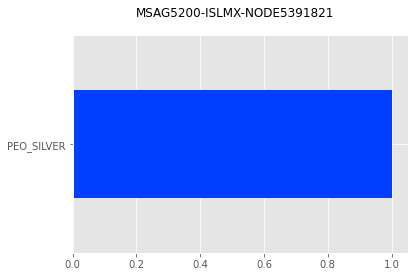

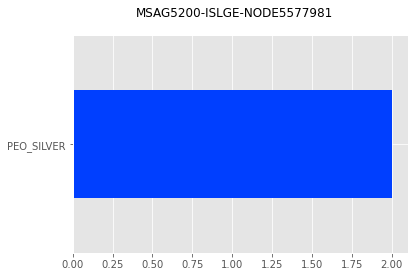

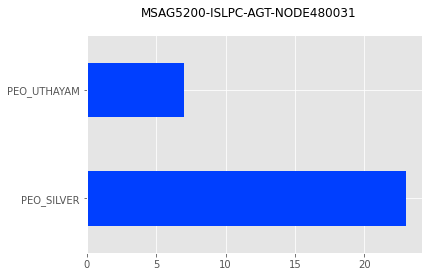

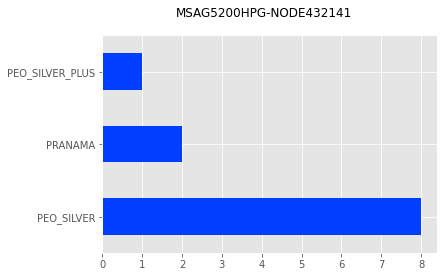

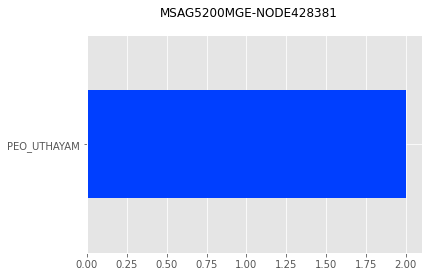

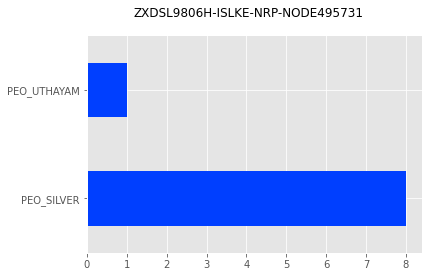

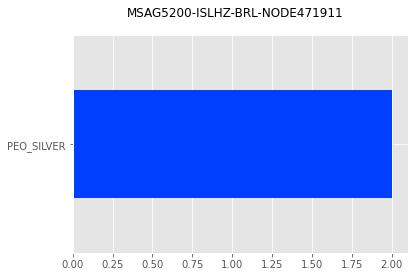

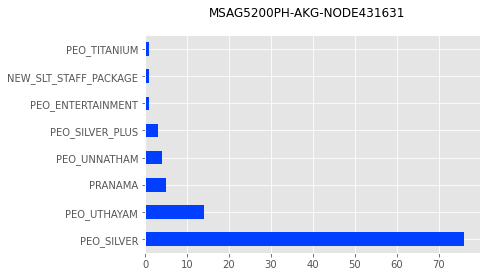

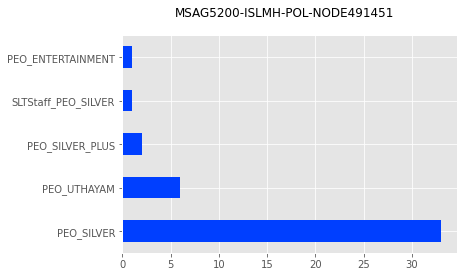

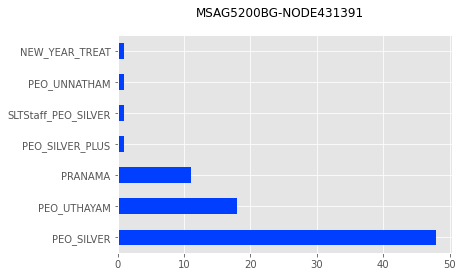

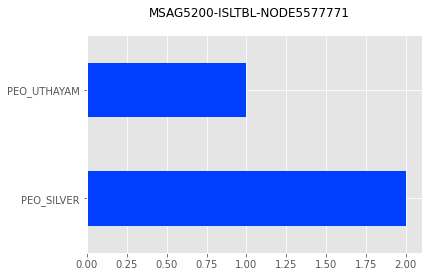

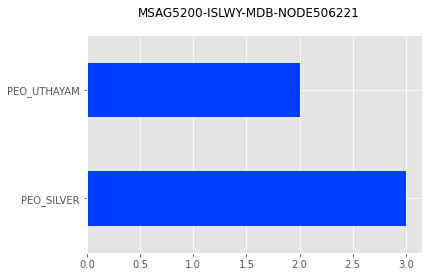

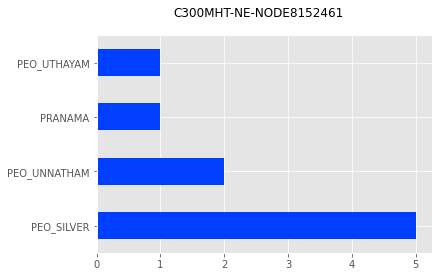

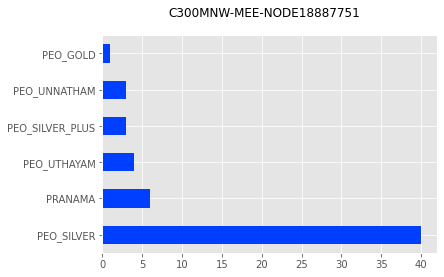

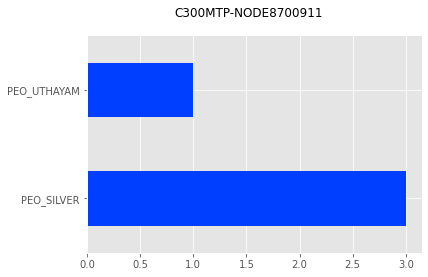

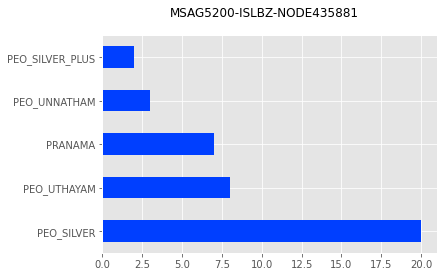

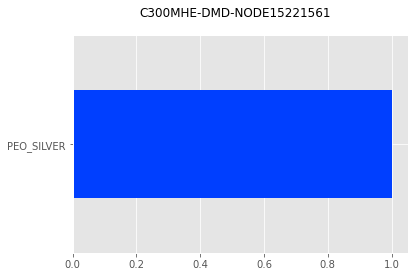

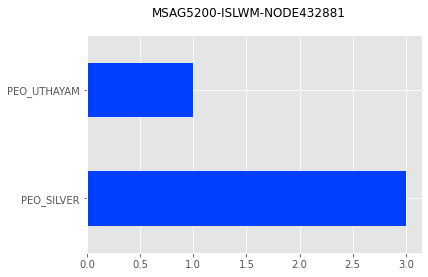

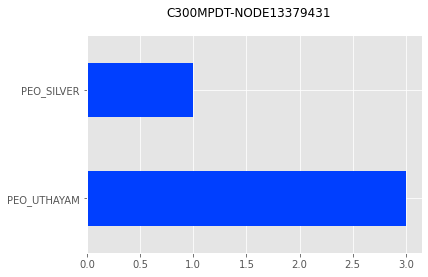

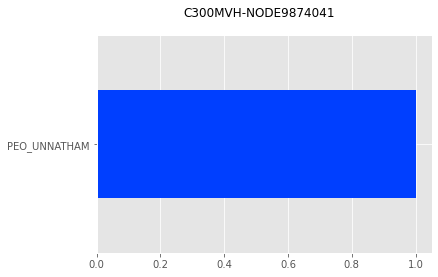

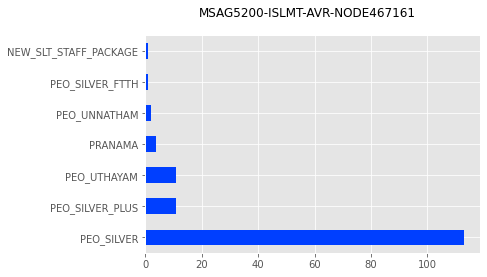

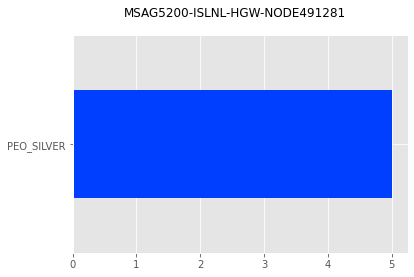

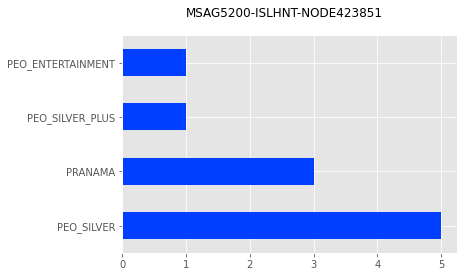

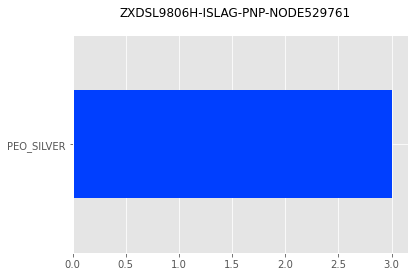

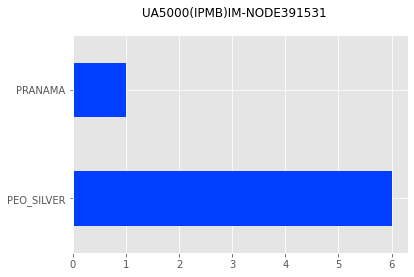

In [73]:
for loc in location_arr:
    user_loc_df = cluster_2[((cluster_2["Location_Identifier"]==loc) & (cluster_2["Peo_TV_Package"] != "NO_INFO"))]
    plt.figure(figsize=(6,4))
    plt.suptitle(loc)
    if (len(user_loc_df["Peo_TV_Package"].value_counts()) > 0):
        user_loc_df["Peo_TV_Package"].value_counts().plot(kind='barh', label=loc)

#### Popularity of PeoTV VAS Packages among Locations

<ipython-input-74-6e76c9be7542>:3: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



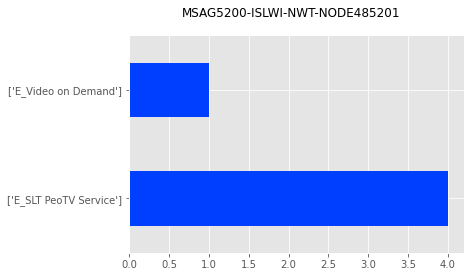

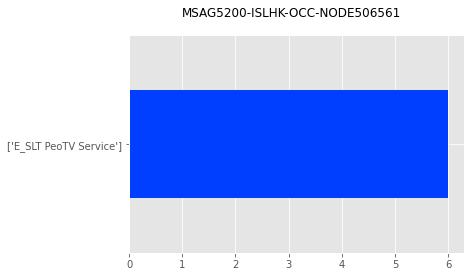

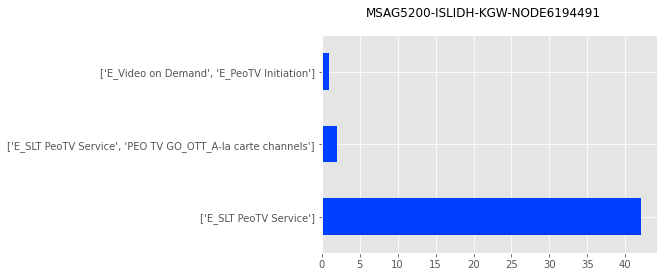

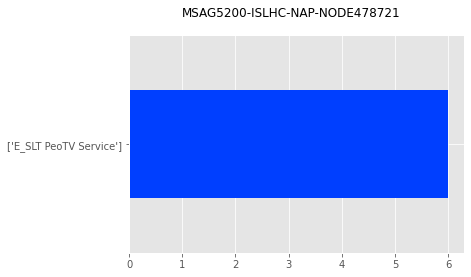

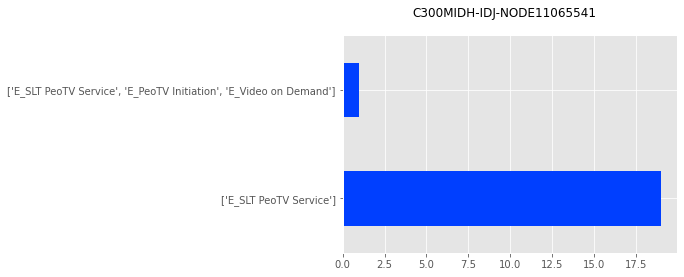

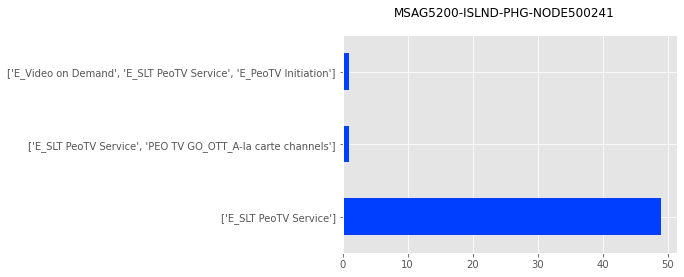

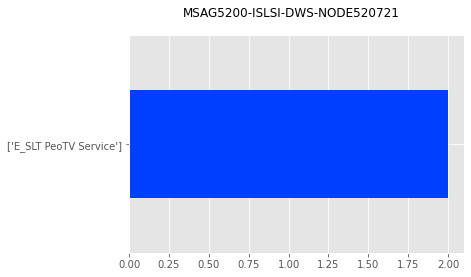

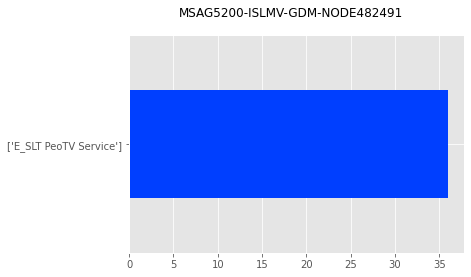

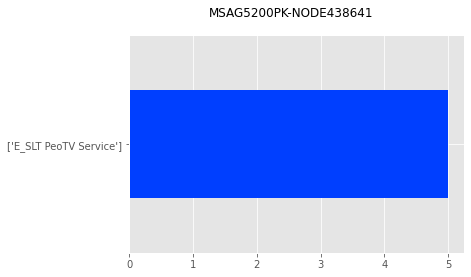

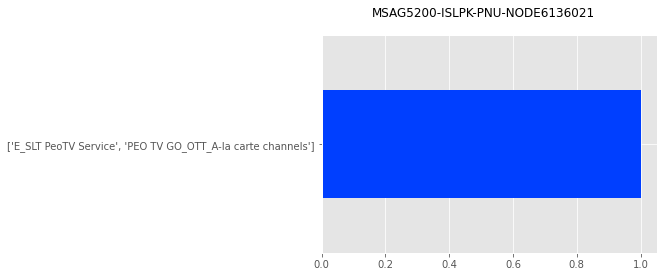

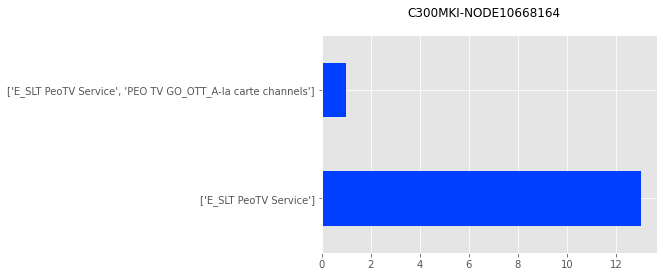

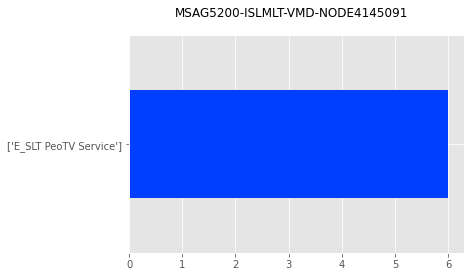

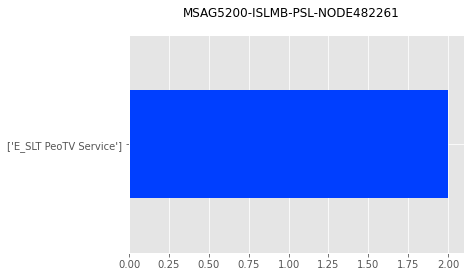

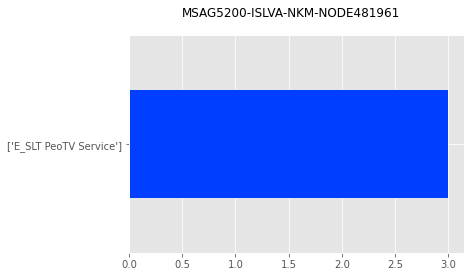

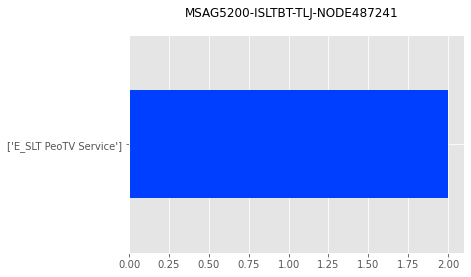

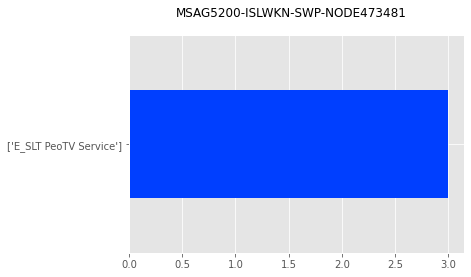

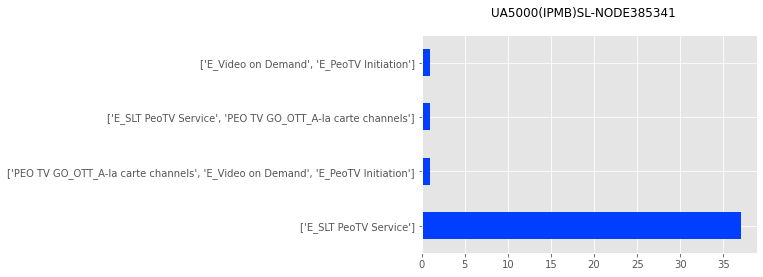

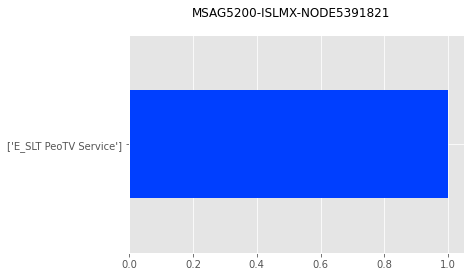

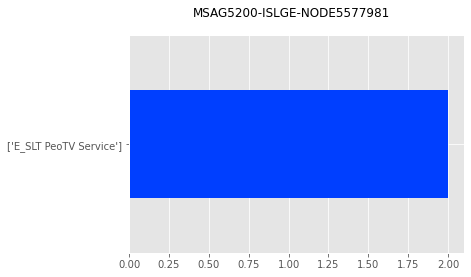

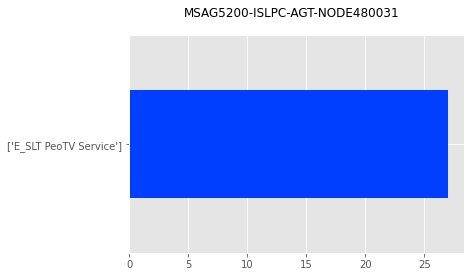

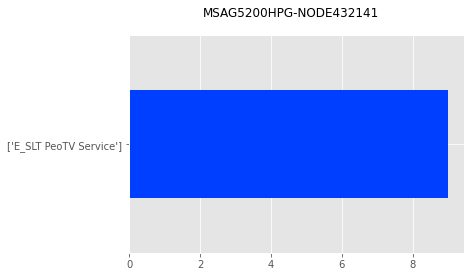

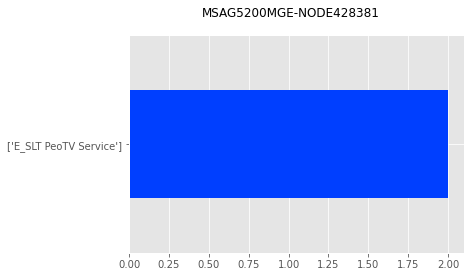

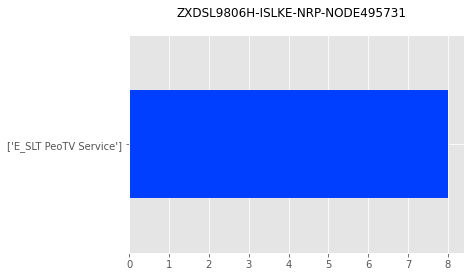

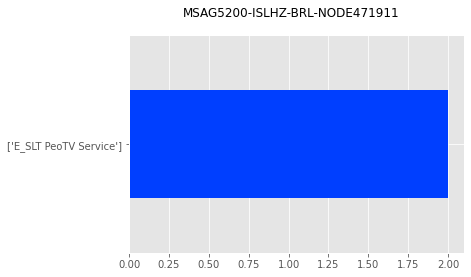

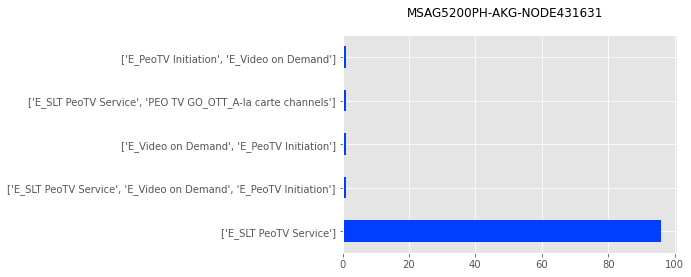

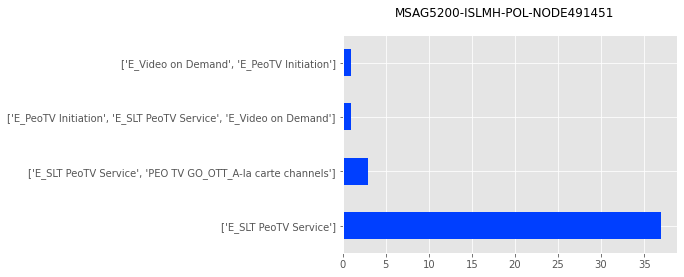

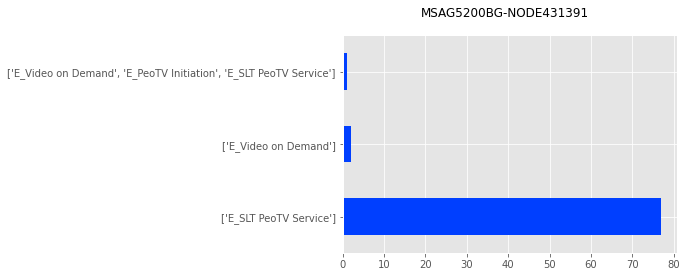

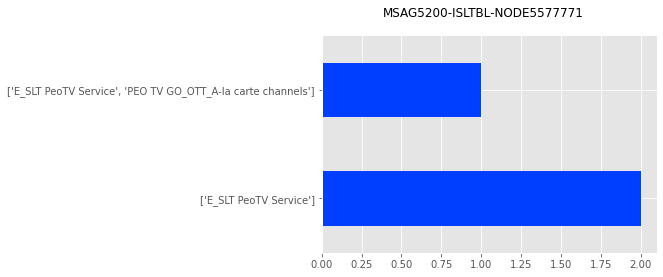

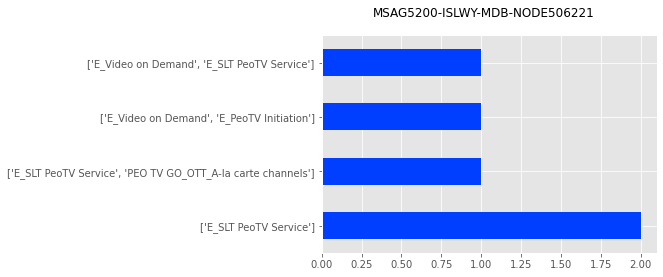

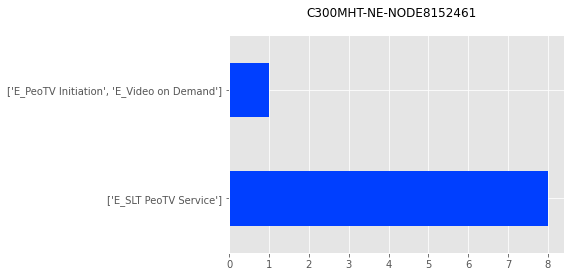

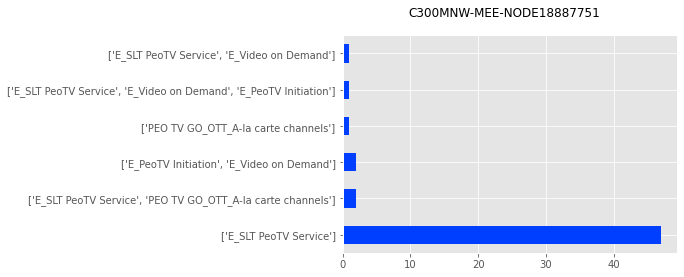

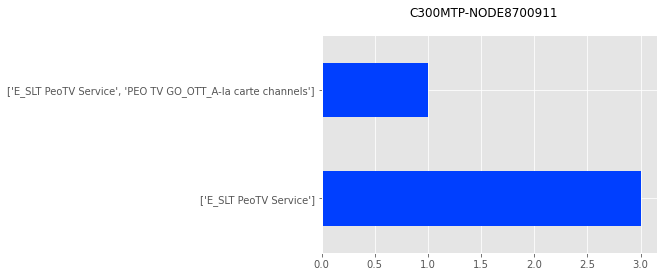

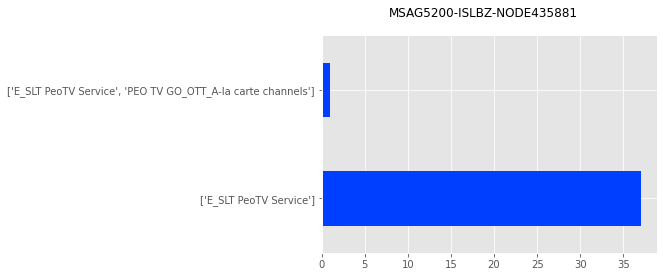

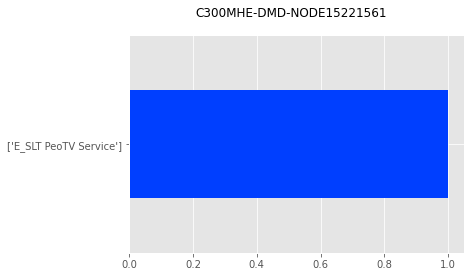

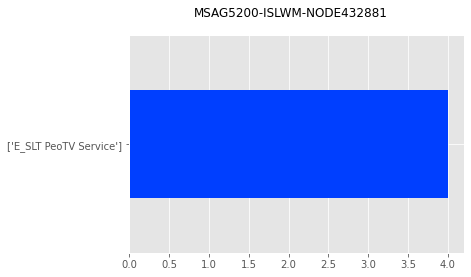

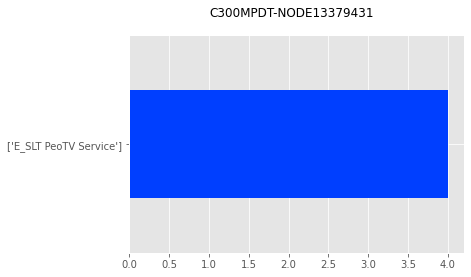

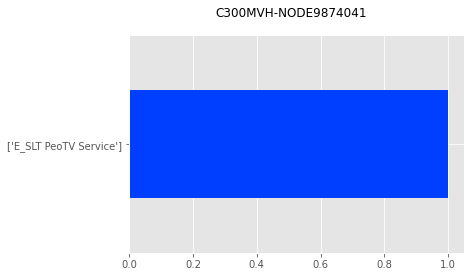

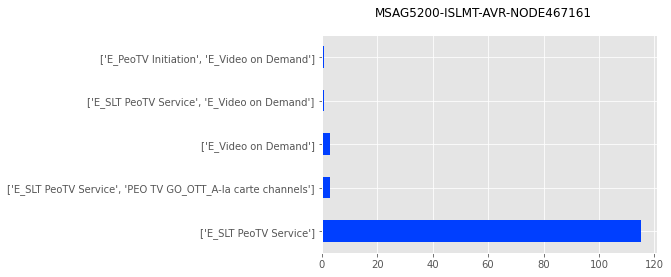

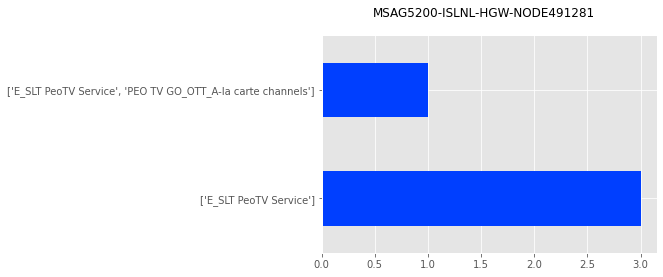

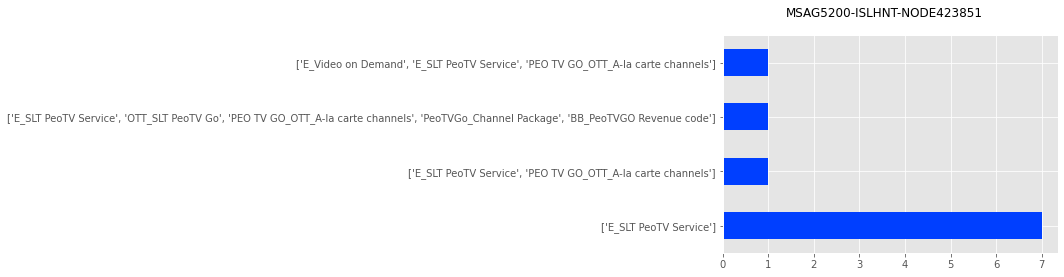

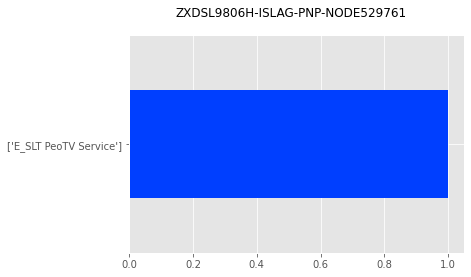

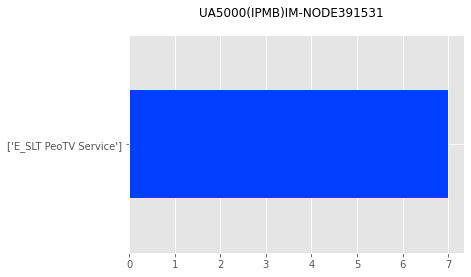

In [74]:
for loc in location_arr:
    user_loc_df = cluster_2[((cluster_2["Location_Identifier"]==loc) & (cluster_2["Peo_VAS_Package"] != "NO_INFO"))]
    plt.figure(figsize=(6,4))
    plt.suptitle(loc)
    if (len(user_loc_df["Peo_VAS_Package"].value_counts()) > 0):
        user_loc_df["Peo_VAS_Package"].value_counts().plot(kind='barh', label=loc)

#### Popularity of BB VAS Packages among Locations

<ipython-input-75-80f6c42986c3>:3: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



<Figure size 432x288 with 0 Axes>

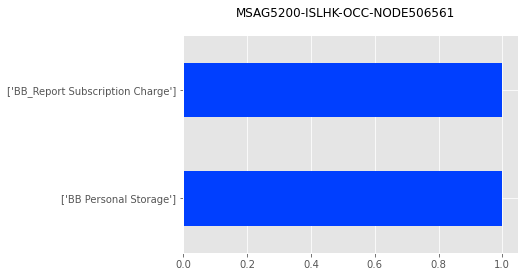

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

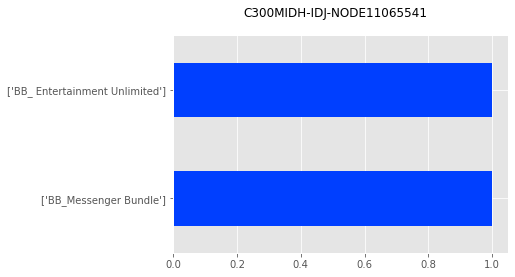

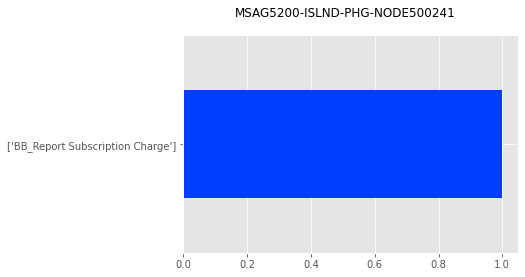

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

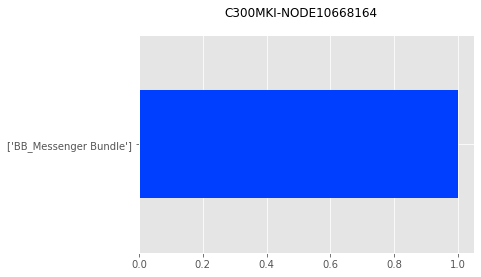

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

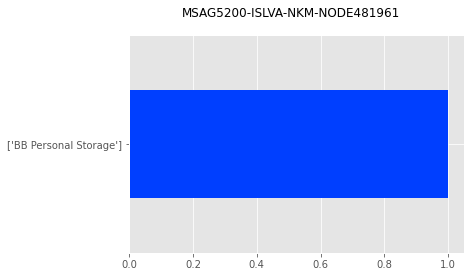

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

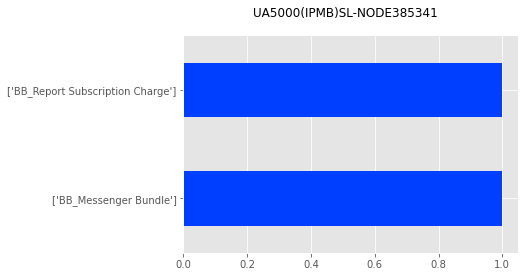

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

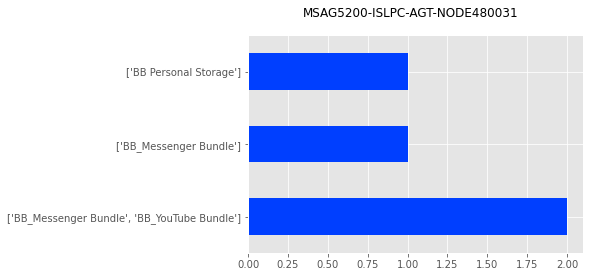

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

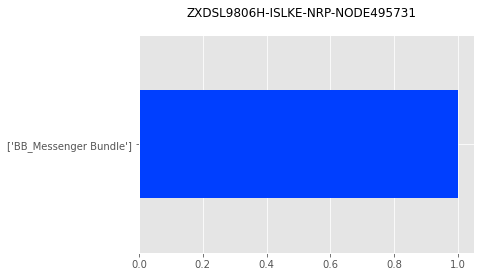

<Figure size 432x288 with 0 Axes>

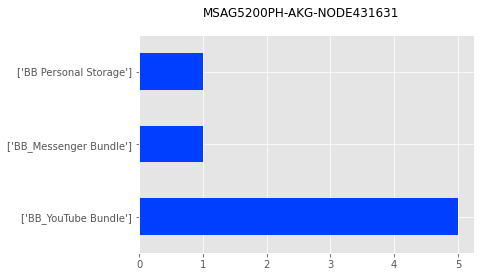

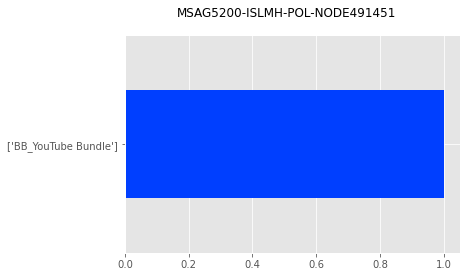

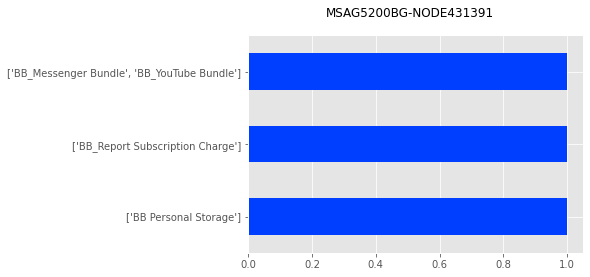

<Figure size 432x288 with 0 Axes>

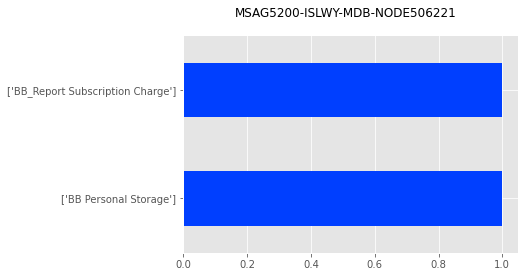

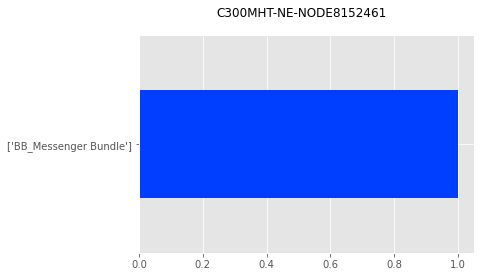

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

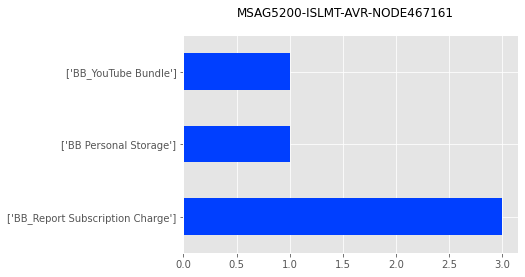

<Figure size 432x288 with 0 Axes>

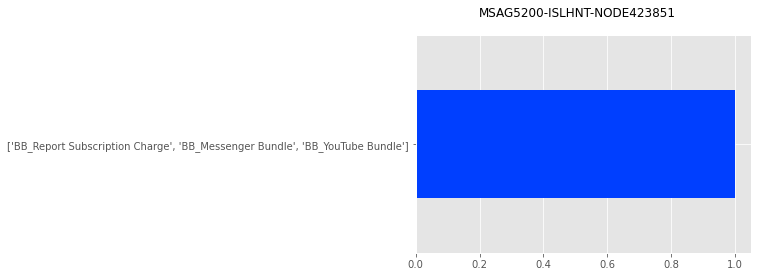

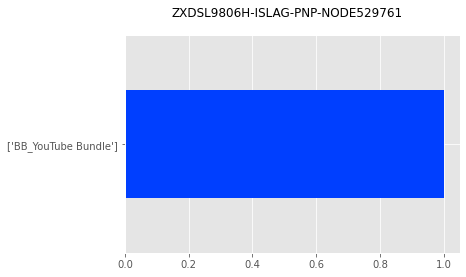

<Figure size 432x288 with 0 Axes>

In [75]:
for loc in location_arr:
    user_loc_df = cluster_2[((cluster_2["Location_Identifier"]==loc) & (cluster_2["BB_VAS_Package"] != "NO_INFO"))]
    plt.figure(figsize=(6,4))
    plt.suptitle(loc)
    if (len(user_loc_df["BB_VAS_Package"].value_counts()) > 0):
        user_loc_df["BB_VAS_Package"].value_counts().plot(kind='barh', label=loc)

## Gender Analysis

<AxesSubplot:ylabel='GENDER'>

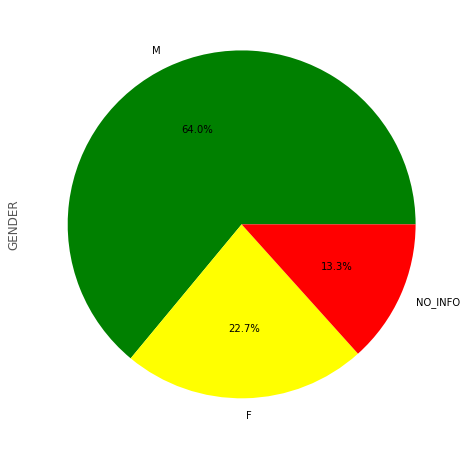

In [76]:
cluster_2["GENDER"].value_counts().plot(kind='pie', figsize=(8,8), autopct='%1.1f%%',colors = ['green','yellow','red'])

#### Subscription Types by Gender

<AxesSubplot:xlabel='Sub_Type'>

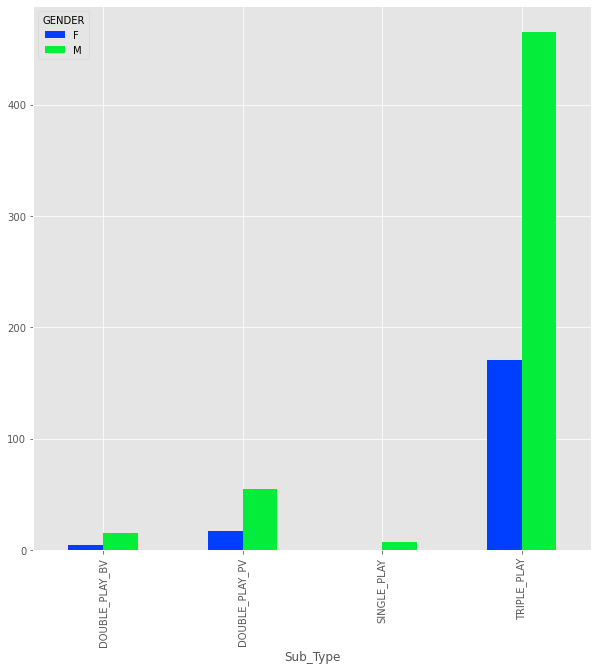

In [77]:
cluster_2[(cluster_2["GENDER"] != "NO_INFO")].groupby(["Sub_Type", "GENDER"]).size().unstack().plot.bar(figsize=(10,10))

### Service Usage on Gender

#### PeoTV Usage by Gender

array([<AxesSubplot:ylabel='PEO_TV_Scaled'>], dtype=object)

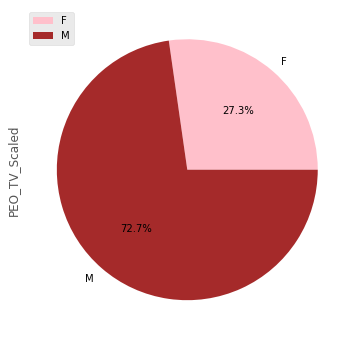

In [78]:
cluster_2[(cluster_2["GENDER"] != "NO_INFO")][["PEO_TV_Scaled", "GENDER"]].groupby("GENDER").sum().plot(kind='pie', figsize=(6,6), autopct='%1.1f%%',colors=("pink","brown"), subplots=True)

#### BB Usage by Gender

array([<AxesSubplot:ylabel='BB_Scaled'>], dtype=object)

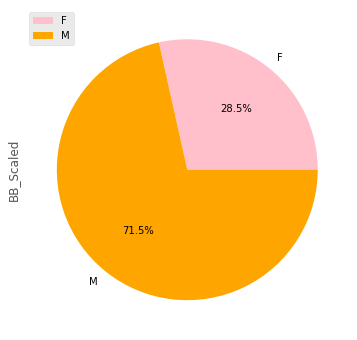

In [79]:
cluster_2[(cluster_2["GENDER"] != "NO_INFO")][["BB_Scaled", "GENDER"]].groupby("GENDER").sum().plot(kind='pie', figsize=(6,6), autopct='%1.1f%%',colors=("pink","orange"), subplots=True)

#### IDD Usage by Gender

array([<AxesSubplot:ylabel='IDD_INCOMING_Scaled'>], dtype=object)

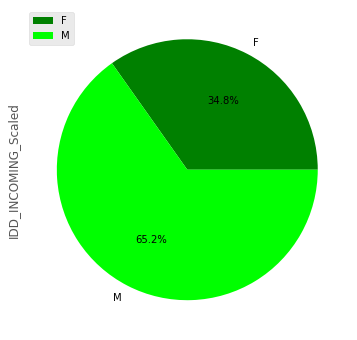

In [80]:
cluster_2[(cluster_2["GENDER"] != "NO_INFO")][["IDD_INCOMING_Scaled", "GENDER"]].groupby("GENDER").sum().plot(kind='pie', figsize=(6,6), autopct='%1.1f%%',colors=("green","lime"), subplots=True)

#### Popular PeoTV Package

<AxesSubplot:xlabel='Peo_TV_Package'>

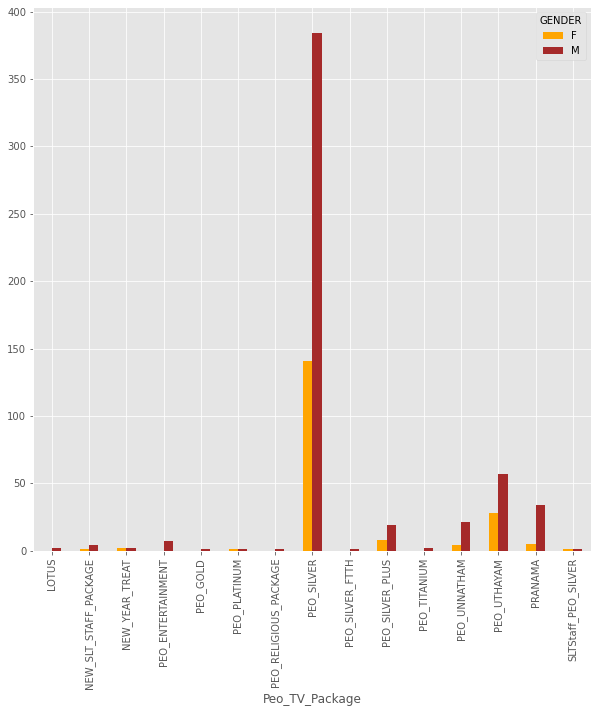

In [81]:
 cluster_2[((cluster_2["GENDER"] != "NO_INFO") &(cluster_2["Peo_TV_Package"] != "NO_INFO"))].groupby(["Peo_TV_Package", "GENDER"]).size().unstack().plot.bar(figsize=(10,10),color=("orange", "brown"))

## AGE Analysis

In [82]:
cluster_2["AGE"].describe()

count    734.000000
mean      55.320163
std       14.570324
min       21.000000
25%       45.000000
50%       55.000000
75%       65.000000
max      121.000000
Name: AGE, dtype: float64

In [83]:
bins = [0, 30,55,65,85,110]
cluster_2['AGE_Groups'] = pd.cut(cluster_2['AGE'], bins)

<ipython-input-83-b41f0025cf00>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<AxesSubplot:ylabel='AGE_Groups'>

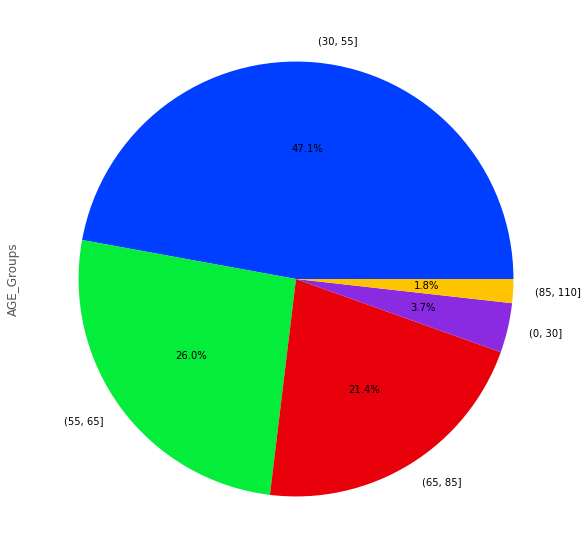

In [84]:
cluster_2["AGE_Groups"].value_counts().plot(kind='pie', figsize=(10,10), autopct='%1.1f%%')

#### Subscription Types by Age Groups

<AxesSubplot:xlabel='Sub_Type'>

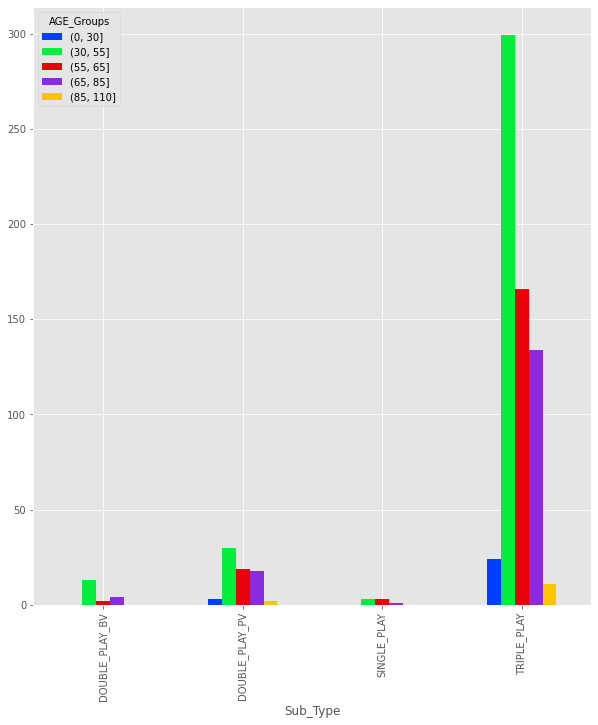

In [85]:
cluster_2.groupby(["Sub_Type", "AGE_Groups"]).size().unstack().plot.bar(figsize=(10,11))

### Service Usage by Age Groups

#### PeoTV Usage by Gender

array([<AxesSubplot:ylabel='PEO_TV_Scaled'>], dtype=object)

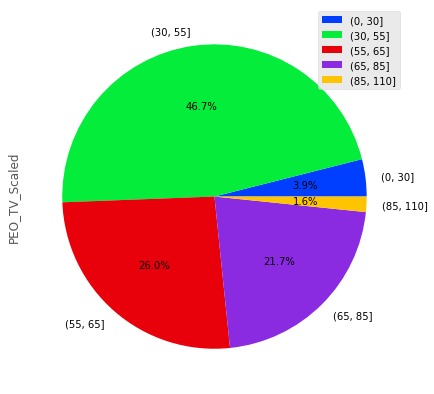

In [86]:
cluster_2[["PEO_TV_Scaled", "AGE_Groups"]].groupby("AGE_Groups").sum().plot(kind='pie', figsize=(7,7), autopct='%1.1f%%', subplots=True)

#### BB Usage by Gender

array([<AxesSubplot:ylabel='BB_Scaled'>], dtype=object)

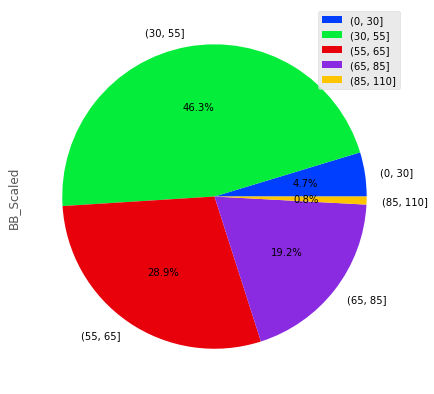

In [87]:
cluster_2[["BB_Scaled", "AGE_Groups"]].groupby("AGE_Groups").sum().plot(kind='pie', figsize=(7,7), autopct='%1.1f%%',subplots=True)

#### IDD Usage by Gender

array([<AxesSubplot:ylabel='IDD_INCOMING_Scaled'>], dtype=object)

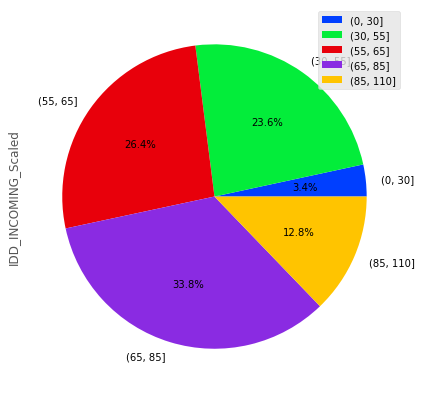

In [88]:
cluster_2[["IDD_INCOMING_Scaled", "AGE_Groups"]].groupby("AGE_Groups").sum().plot(kind='pie', figsize=(7,7), autopct='%1.1f%%', subplots=True)

#### Popular PeoTV Package

<AxesSubplot:xlabel='Peo_TV_Package'>

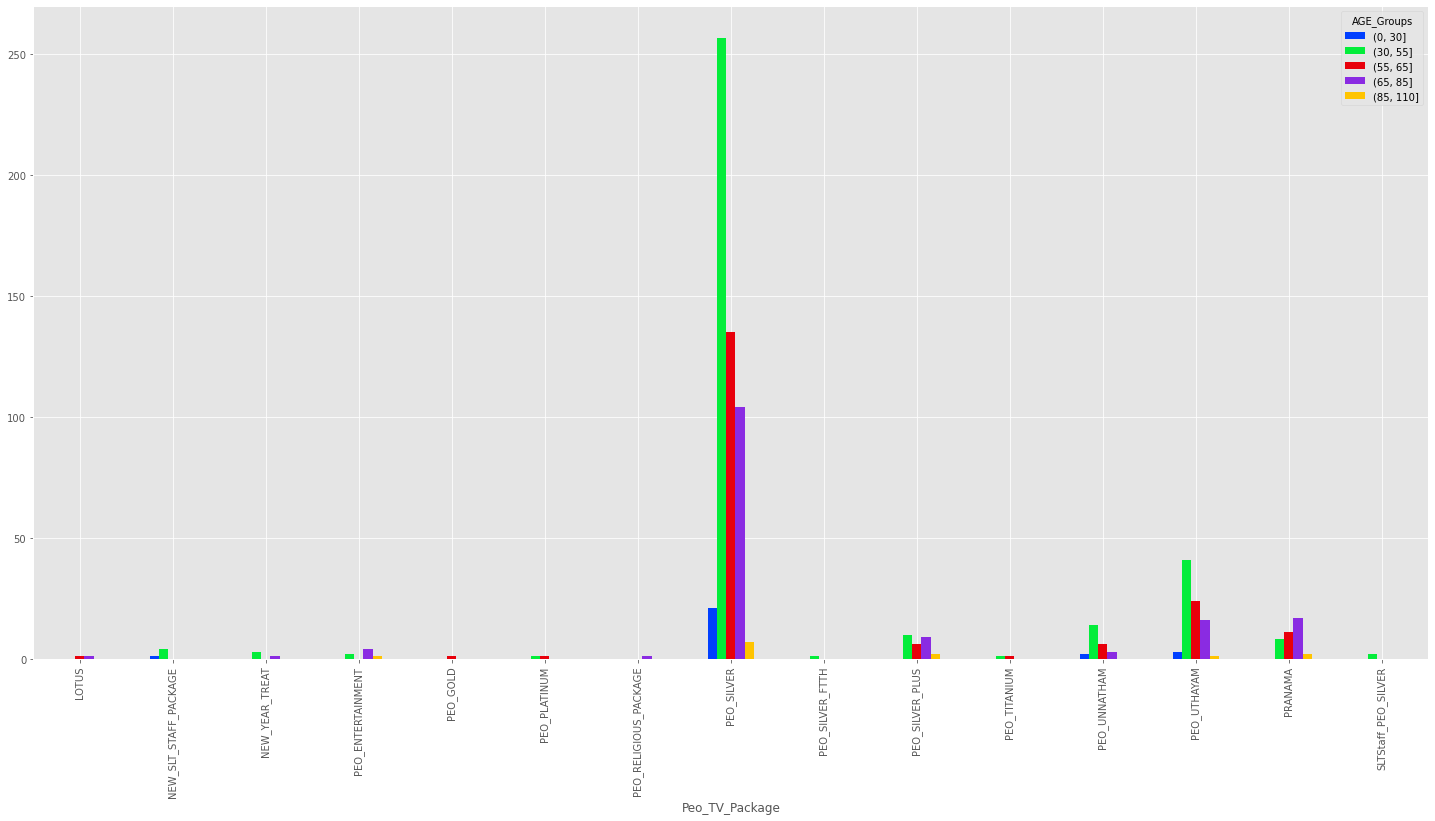

In [89]:
cluster_2[(cluster_2["Peo_TV_Package"] != "NO_INFO")].groupby(["Peo_TV_Package", "AGE_Groups"]).size().unstack().plot.bar(figsize=(25,12))

## ToDo
- Age and Gender wise VAS analysis

### Socio-economic factors

In [90]:
cluster_2["Having_Insurance"].value_counts()

NO_INFO    683
YES        164
Name: Having_Insurance, dtype: int64

<AxesSubplot:xlabel='Having_Insurance'>

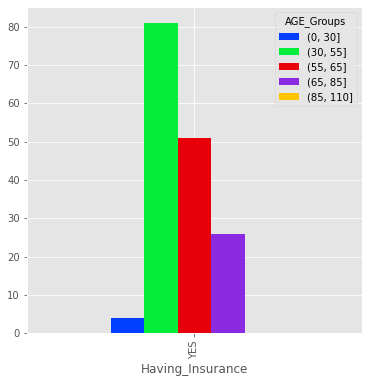

In [91]:
cluster_2[(cluster_2["Having_Insurance"] != "NO_INFO")].groupby(["Having_Insurance", "AGE_Groups"]).size().unstack().plot.bar(figsize=(6,6))

<AxesSubplot:xlabel='Having_Insurance'>

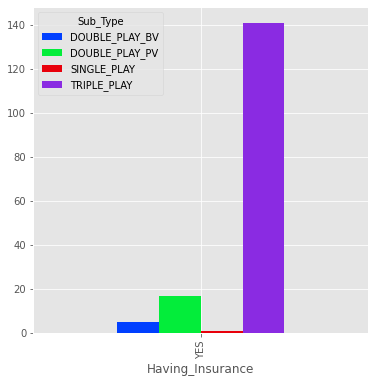

In [92]:
cluster_2[(cluster_2["Having_Insurance"] != "NO_INFO")].groupby(["Having_Insurance", "Sub_Type"]).size().unstack().plot.bar(figsize=(6,6))

<AxesSubplot:xlabel='Having_Insurance'>

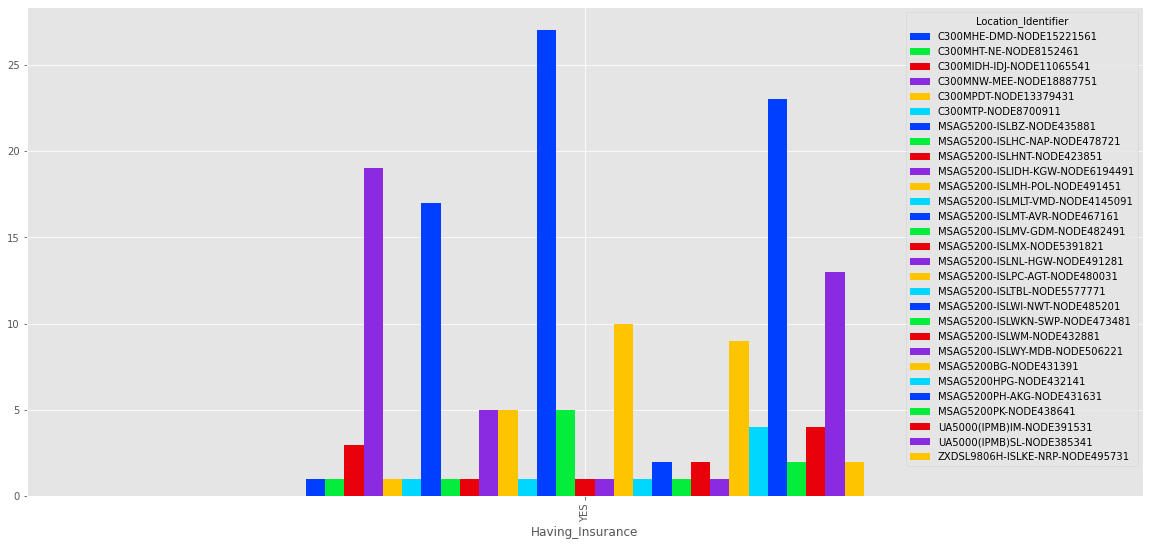

In [93]:
cluster_2[(cluster_2["Having_Insurance"] != "NO_INFO")].groupby(["Having_Insurance", "Location_Identifier"]).size().unstack().plot.bar(figsize=(20,9))

#### Having Senior citizens

In [94]:
cluster_2["Having_Senior_Citizen"].value_counts()

NO_INFO    664
YES        183
Name: Having_Senior_Citizen, dtype: int64

<AxesSubplot:xlabel='Having_Senior_Citizen'>

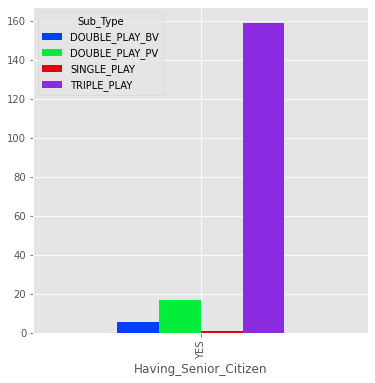

In [95]:
cluster_2[(cluster_2["Having_Senior_Citizen"] != "NO_INFO")].groupby(["Having_Senior_Citizen", "Sub_Type"]).size().unstack().plot.bar(figsize=(6,6))

<AxesSubplot:xlabel='Having_Senior_Citizen'>

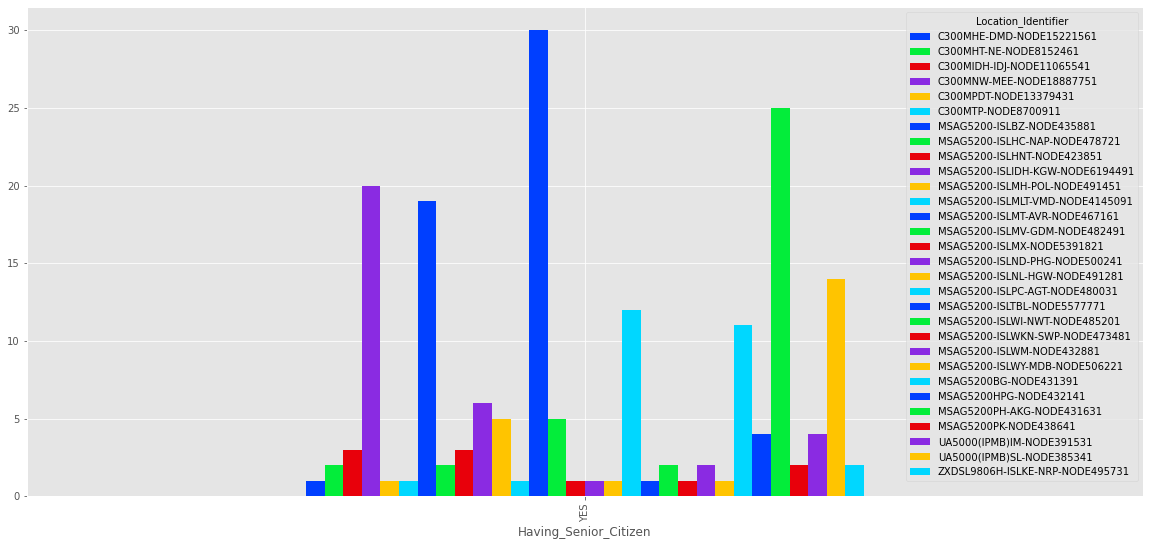

In [96]:
cluster_2[(cluster_2["Having_Senior_Citizen"] != "NO_INFO")].groupby(["Having_Senior_Citizen", "Location_Identifier"]).size().unstack().plot.bar(figsize=(20,9))

#### Having a family member abroad

In [97]:
cluster_2["Having_Family_Member_Abroad"].value_counts()

NO_INFO    671
YES        176
Name: Having_Family_Member_Abroad, dtype: int64

<AxesSubplot:xlabel='Having_Family_Member_Abroad'>

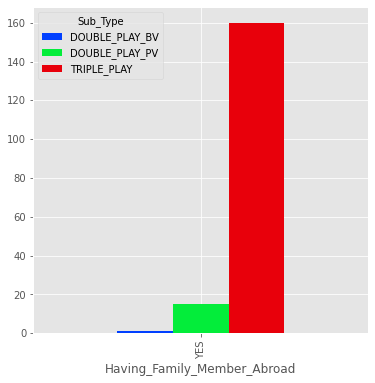

In [98]:
cluster_2[(cluster_2["Having_Family_Member_Abroad"] != "NO_INFO")].groupby(["Having_Family_Member_Abroad", "Sub_Type"]).size().unstack().plot.bar(figsize=(6,6))

<AxesSubplot:xlabel='Having_Family_Member_Abroad'>

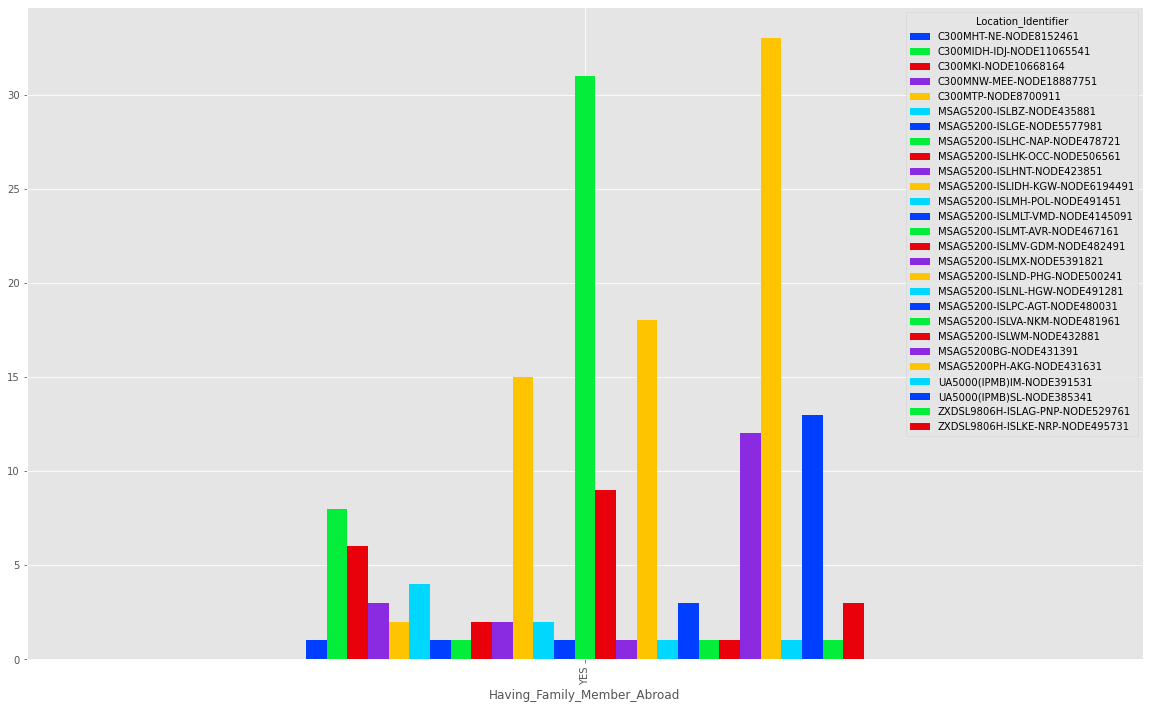

In [99]:
cluster_2[(cluster_2["Having_Family_Member_Abroad"] != "NO_INFO")].groupby(["Having_Family_Member_Abroad", "Location_Identifier"]).size().unstack().plot.bar(figsize=(20,12))

#### Having a working professional

In [100]:
cluster_2["Having_Working_Professionals"].value_counts()

NO_INFO    687
YES        160
Name: Having_Working_Professionals, dtype: int64

<AxesSubplot:xlabel='Having_Working_Professionals'>

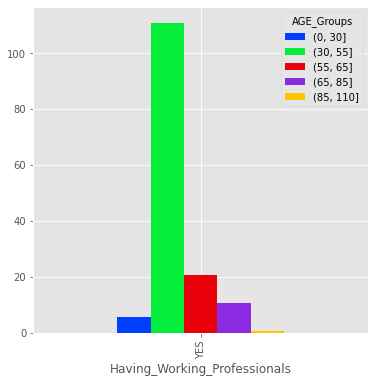

In [101]:
cluster_2[(cluster_2["Having_Working_Professionals"] != "NO_INFO")].groupby(["Having_Working_Professionals", "AGE_Groups"]).size().unstack().plot.bar(figsize=(6,6))

<AxesSubplot:xlabel='Having_Working_Professionals'>

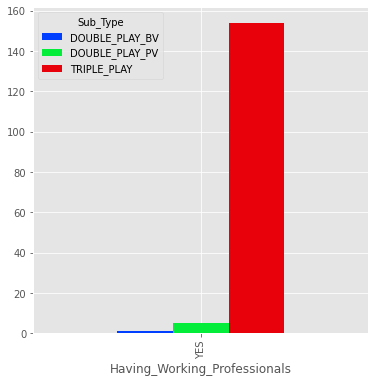

In [102]:
cluster_2[(cluster_2["Having_Working_Professionals"] != "NO_INFO")].groupby(["Having_Working_Professionals", "Sub_Type"]).size().unstack().plot.bar(figsize=(6,6))

<AxesSubplot:xlabel='Having_Working_Professionals'>

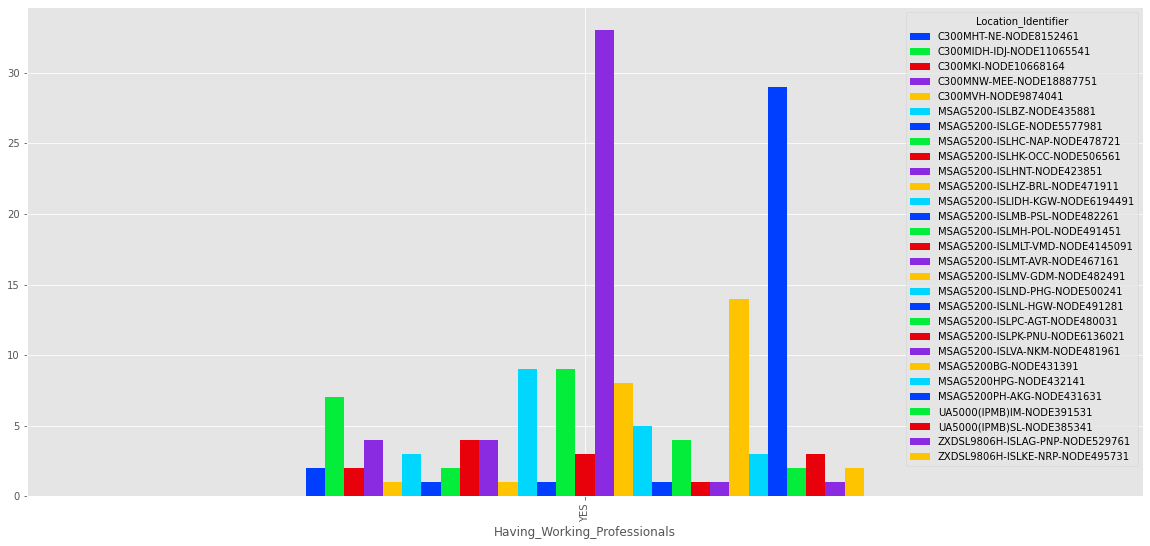

In [103]:
cluster_2[(cluster_2["Having_Working_Professionals"] != "NO_INFO")].groupby(["Having_Working_Professionals", "Location_Identifier"]).size().unstack().plot.bar(figsize=(20,9))

#### Having Teenagers Students

In [104]:
cluster_2["Having_Teenagers_Students"].value_counts()

NO_INFO    690
YES        157
Name: Having_Teenagers_Students, dtype: int64

<AxesSubplot:xlabel='Having_Teenagers_Students'>

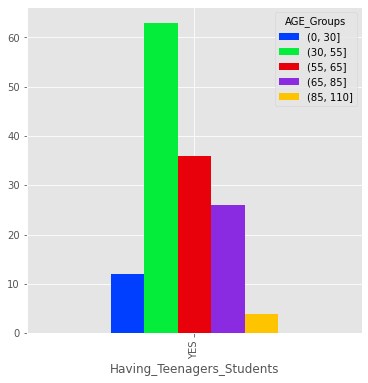

In [105]:
cluster_2[(cluster_2["Having_Teenagers_Students"] != "NO_INFO")].groupby(["Having_Teenagers_Students", "AGE_Groups"]).size().unstack().plot.bar(figsize=(6,6))

<AxesSubplot:xlabel='Having_Teenagers_Students'>

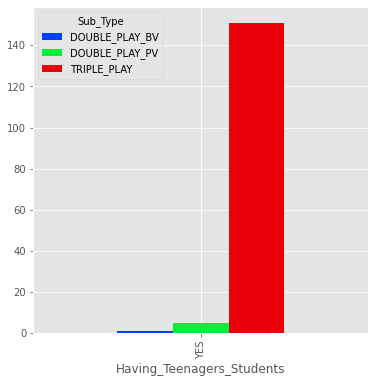

In [106]:
cluster_2[(cluster_2["Having_Teenagers_Students"] != "NO_INFO")].groupby(["Having_Teenagers_Students", "Sub_Type"]).size().unstack().plot.bar(figsize=(6,6))

<AxesSubplot:xlabel='Having_Teenagers_Students'>

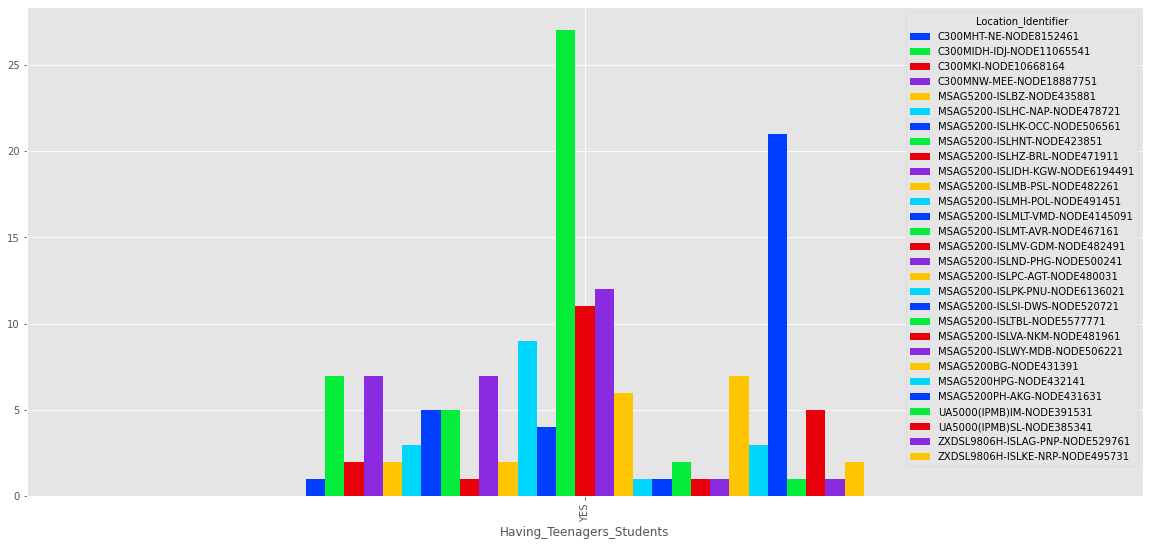

In [107]:
cluster_2[(cluster_2["Having_Teenagers_Students"] != "NO_INFO")].groupby(["Having_Teenagers_Students", "Location_Identifier"]).size().unstack().plot.bar(figsize=(20,9))

#### Having a Tamil customer

In [108]:
cluster_2["Tamil_Customer"].value_counts()

NO_INFO    723
YES        124
Name: Tamil_Customer, dtype: int64

<AxesSubplot:xlabel='Tamil_Customer'>

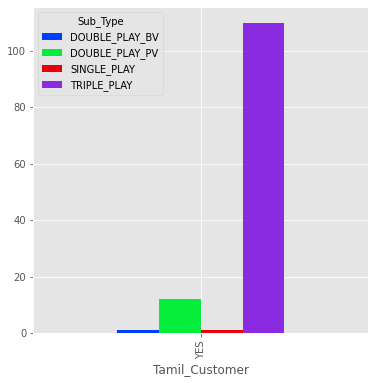

In [109]:
cluster_2[(cluster_2["Tamil_Customer"] != "NO_INFO")].groupby(["Tamil_Customer", "Sub_Type"]).size().unstack().plot.bar(figsize=(6,6))

<AxesSubplot:xlabel='Tamil_Customer'>

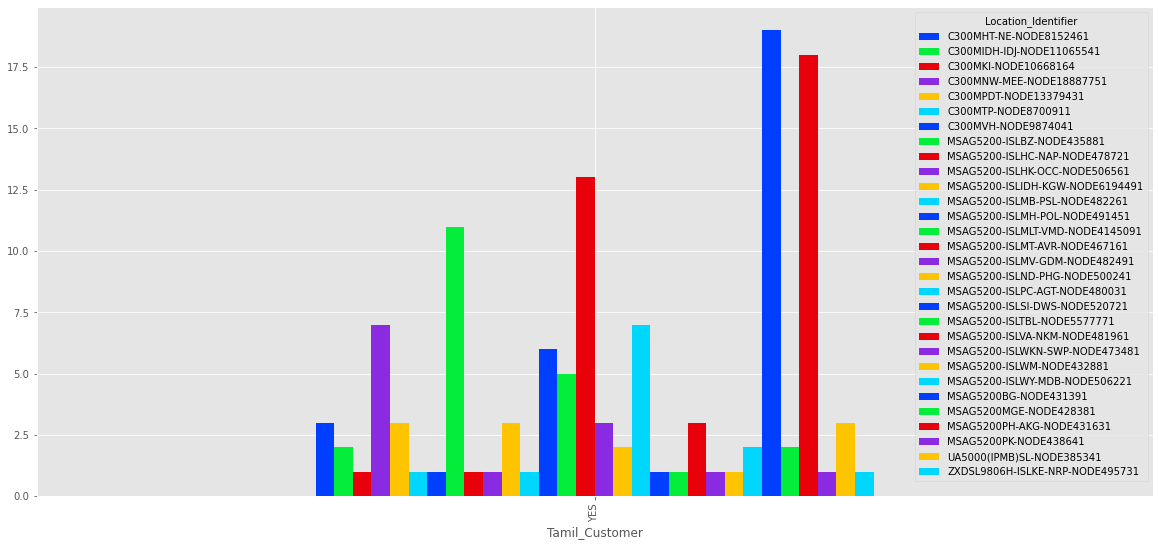

In [110]:
cluster_2[(cluster_2["Tamil_Customer"] != "NO_INFO")].groupby(["Tamil_Customer", "Location_Identifier"]).size().unstack().plot.bar(figsize=(20,9))

#### Having Kids at Home

In [111]:
cluster_2["Having_Kids_at_Home"].value_counts()

NO_INFO    662
YES        185
Name: Having_Kids_at_Home, dtype: int64

<AxesSubplot:xlabel='Having_Kids_at_Home'>

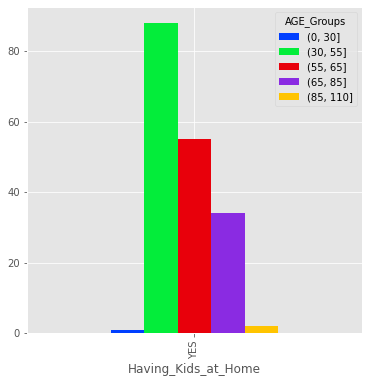

In [112]:
cluster_2[(cluster_2["Having_Kids_at_Home"] != "NO_INFO")].groupby(["Having_Kids_at_Home", "AGE_Groups"]).size().unstack().plot.bar(figsize=(6,6))

<AxesSubplot:xlabel='Having_Kids_at_Home'>

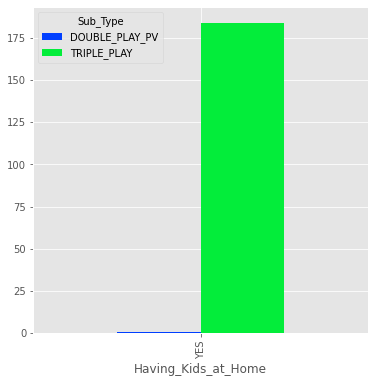

In [113]:
cluster_2[(cluster_2["Having_Kids_at_Home"] != "NO_INFO")].groupby(["Having_Kids_at_Home", "Sub_Type"]).size().unstack().plot.bar(figsize=(6,6))

<AxesSubplot:xlabel='Having_Kids_at_Home'>

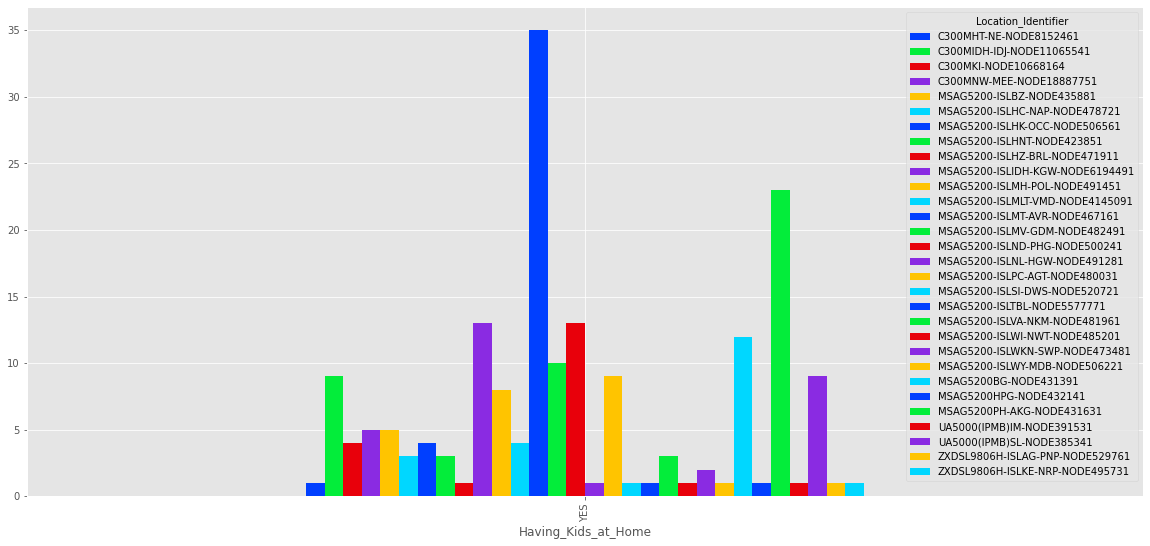

In [114]:
cluster_2[(cluster_2["Having_Kids_at_Home"] != "NO_INFO")].groupby(["Having_Kids_at_Home", "Location_Identifier"]).size().unstack().plot.bar(figsize=(20,9))

### Identifying factors for recommending Packages for Cluster 1

#### Feasible locations to offer PeoTV

In [115]:
cluster_2_peo_loc = cluster_2[(cluster_2["Sub_Type"] == "TRIPLE_PLAY") | (cluster_2["Sub_Type"] == "DOUBLE_PLAY_PV")].groupby('Location_Identifier').count()["event_source.hash"]

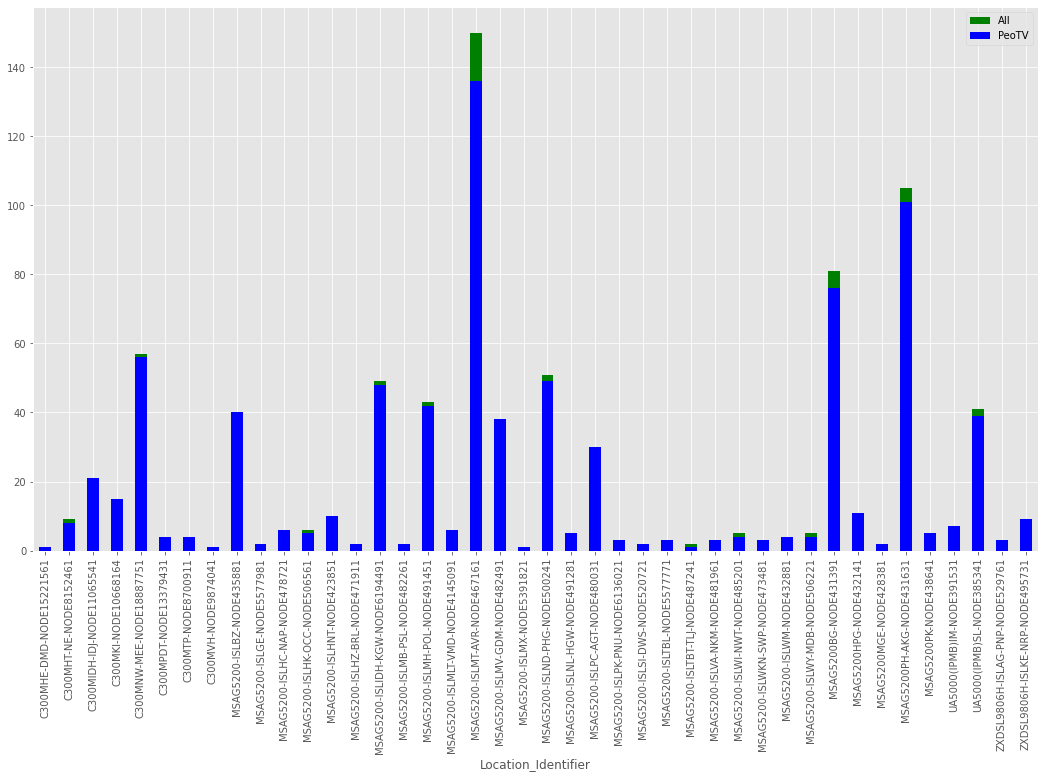

In [116]:
ax = cluster_2_loc.plot(stacked=True, kind="bar", figsize=(18,10), color="green")
cluster_2_peo_loc.plot(stacked=True, kind="bar",ax=ax, figsize=(18,10), color="blue")
plt.legend(["All","PeoTV"])

In [117]:
loc_precentage=(cluster_2_peo_loc/cluster_2_loc)*100

In [118]:
loc_precentage[(loc_precentage > 60)]

Location_Identifier
C300MHE-DMD-NODE15221561           100.000000
C300MHT-NE-NODE8152461              88.888889
C300MIDH-IDJ-NODE11065541          100.000000
C300MKI-NODE10668164               100.000000
C300MNW-MEE-NODE18887751            98.245614
C300MPDT-NODE13379431              100.000000
C300MTP-NODE8700911                100.000000
C300MVH-NODE9874041                100.000000
MSAG5200-ISLBZ-NODE435881          100.000000
MSAG5200-ISLGE-NODE5577981         100.000000
MSAG5200-ISLHC-NAP-NODE478721      100.000000
MSAG5200-ISLHK-OCC-NODE506561       83.333333
MSAG5200-ISLHNT-NODE423851         100.000000
MSAG5200-ISLHZ-BRL-NODE471911      100.000000
MSAG5200-ISLIDH-KGW-NODE6194491     97.959184
MSAG5200-ISLMB-PSL-NODE482261      100.000000
MSAG5200-ISLMH-POL-NODE491451       97.674419
MSAG5200-ISLMLT-VMD-NODE4145091    100.000000
MSAG5200-ISLMT-AVR-NODE467161       90.666667
MSAG5200-ISLMV-GDM-NODE482491      100.000000
MSAG5200-ISLMX-NODE5391821         100.000000
MSAG5200-ISLND

#### Feasible locations to offer Broadband

In [119]:
cluster_2_bb_loc = cluster_2[(cluster_2["Sub_Type"] == "TRIPLE_PLAY") | (cluster_2["Sub_Type"] == "DOUBLE_PLAY_BV")].groupby('Location_Identifier').count()["event_source.hash"]

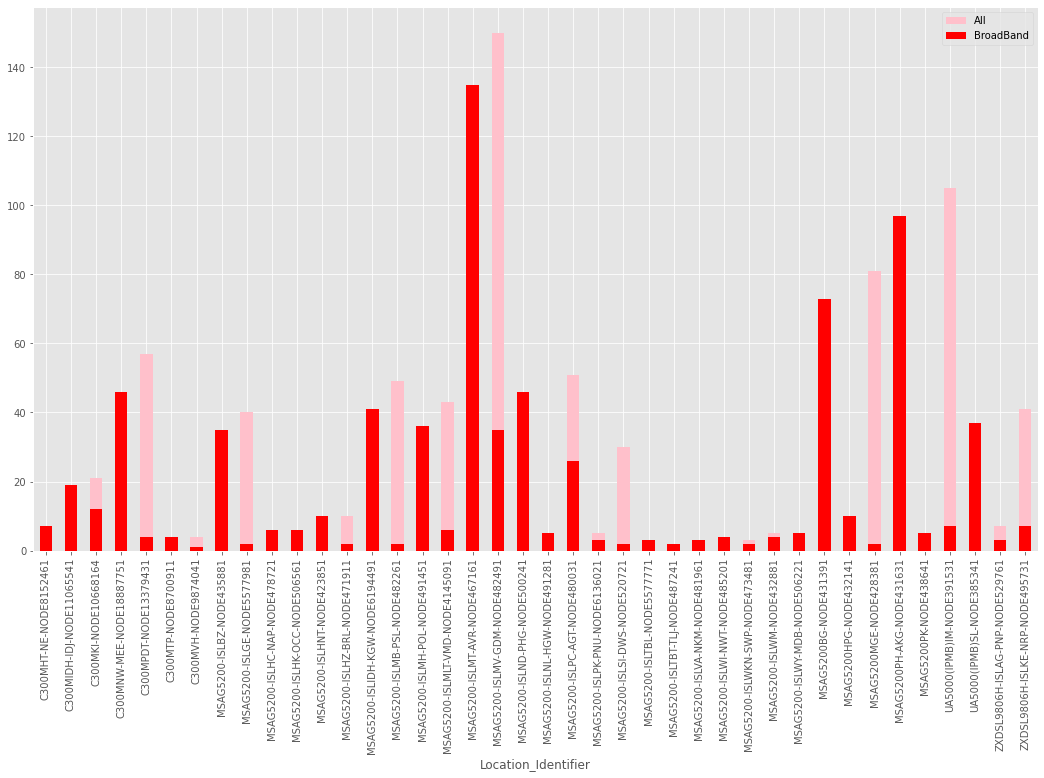

In [120]:
ax = cluster_2_loc.plot(stacked=True, kind="bar", figsize=(18,10), color="pink")
cluster_2_bb_loc.plot(stacked=True, kind="bar",ax=ax, figsize=(18,10), color="red")
plt.legend(["All","BroadBand"])

In [121]:
loc_precentage=(cluster_2_bb_loc/cluster_2_loc)*100

In [122]:
loc_precentage[(loc_precentage > 60)]

Location_Identifier
C300MHT-NE-NODE8152461              77.777778
C300MIDH-IDJ-NODE11065541           90.476190
C300MKI-NODE10668164                80.000000
C300MNW-MEE-NODE18887751            80.701754
C300MPDT-NODE13379431              100.000000
C300MTP-NODE8700911                100.000000
C300MVH-NODE9874041                100.000000
MSAG5200-ISLBZ-NODE435881           87.500000
MSAG5200-ISLGE-NODE5577981         100.000000
MSAG5200-ISLHC-NAP-NODE478721      100.000000
MSAG5200-ISLHK-OCC-NODE506561      100.000000
MSAG5200-ISLHNT-NODE423851         100.000000
MSAG5200-ISLHZ-BRL-NODE471911      100.000000
MSAG5200-ISLIDH-KGW-NODE6194491     83.673469
MSAG5200-ISLMB-PSL-NODE482261      100.000000
MSAG5200-ISLMH-POL-NODE491451       83.720930
MSAG5200-ISLMLT-VMD-NODE4145091    100.000000
MSAG5200-ISLMT-AVR-NODE467161       90.000000
MSAG5200-ISLMV-GDM-NODE482491       92.105263
MSAG5200-ISLND-PHG-NODE500241       90.196078
MSAG5200-ISLNL-HGW-NODE491281      100.000000
MSAG5200-ISLPC

## Cluster 2- Findings